# Chennai House Price Prediction
****

### Problem Statement:
1. What is the fair price of a house for buyers?

2. Can you offer any suggestion to the sellers?

## Import Dataset and required Libraries

In [1]:
# import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import klib
import warnings
from matplotlib import pyplot as plt
from janitor import clean_names

# import ML libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

%matplotlib inline
pd.set_option("display.max_rows", None, "display.max_columns", None)
warnings.filterwarnings('ignore')
sns.set_style('darkgrid')
plt.rcParams['figure.figsize'] = (9,4)
plt.rcParams['figure.dpi'] = 120
plt.rcParams['font.size'] = 12

In [2]:
# import dataset
house_data = clean_names(pd.read_csv("train-chennai-sale.csv"))
house_data.head()

prt_id        area  int_sqft   date_sale  dist_mainroad  n_bedroom  \
0  P03210  Karapakkam      1004  04-05-2011            131        1.0   
1  P09411  Anna Nagar      1986  19-12-2006             26        2.0   
2  P01812       Adyar       909  04-02-2012             70        1.0   
3  P05346   Velachery      1855  13-03-2010             14        3.0   
4  P06210  Karapakkam      1226  05-10-2009             84        1.0   

   n_bathroom  n_room sale_cond park_facil  date_build   buildtype  \
0         1.0       3  AbNormal        Yes  15-05-1967  Commercial   
1         1.0       5  AbNormal         No  22-12-1995  Commercial   
2         1.0       3  AbNormal        Yes  09-02-1992  Commercial   
3         2.0       5    Family         No  18-03-1988      Others   
4         1.0       3  AbNormal        Yes  13-10-1979      Others   

  utility_avail  street mzzone  qs_rooms  qs_bathroom  qs_bedroom  qs_overall  \
0        AllPub   Paved      A       4.0          3.9         4.9       4.330   
1        AllPub  Gravel     RH       4.9          4.2         2.5       3.765   
2           ELO  Gravel     RL       4.1          3.8         2.2       3.090   
3       NoSewr    Paved      I       4.7          3.9         3.6       4.010   
4        AllPub  Gravel      C       3.0          2.5         4.1       3.290   

   reg_fee  commis  sales_price  
0   380000  144400      7600000  
1   760122  304049     21717770  
2   421094   92114     13159200  
3   356321   77042      9630290  
4   237000   74063      7406250

In [3]:
# Shape of data
house_data.shape

(7109, 22)

In [4]:
# information
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   prt_id         7109 non-null   object 
 1   area           7109 non-null   object 
 2   int_sqft       7109 non-null   int64  
 3   date_sale      7109 non-null   object 
 4   dist_mainroad  7109 non-null   int64  
 5   n_bedroom      7108 non-null   float64
 6   n_bathroom     7104 non-null   float64
 7   n_room         7109 non-null   int64  
 8   sale_cond      7109 non-null   object 
 9   park_facil     7109 non-null   object 
 10  date_build     7109 non-null   object 
 11  buildtype      7109 non-null   object 
 12  utility_avail  7109 non-null   object 
 13  street         7109 non-null   object 
 14  mzzone         7109 non-null   object 
 15  qs_rooms       7109 non-null   float64
 16  qs_bathroom    7109 non-null   float64
 17  qs_bedroom     7109 non-null   float64
 18  qs_overa

### Understanding Attributes in the data:


1. PART_Id: Id of the particular house i.e. Project ID
2. AREA: The area where house is situated
3. INT_SQFT: Total area of the house in square feet.
4. DATE_SALE: The date in which the house got sold
5. DIST_MAINROAD: How many meters the house is far from main road
6. N_BEDROOM: Total Number of Bedrooms
7. N_BATHROOM: Total Number of bathrooms
8. SALE_COND: Types of sale
9. PARK_FACIL: Parking facility
10. DATE_BUILD: The date in which the house was built
11. BUILDTYPE: What type of building it is i.e. residential or commercial
12. UTILITY_AVAIL: What are the public facilities are available
13. STREET: Type of street(road) the house is situated
14. MZZONE: What zone the house belongs to. (There are currently 13 zones in Chennai)
15. QS_ROOMS: Masked rooms
16. QS_BATHROOM: Masked bathrooms
17. QS_BEDROOM: Masked bedroom
18. QS_OVERALL: 
19. REG_FEE: Total registration fee offered to register the house
20. COMMIS: Total commission payed 
21. SALES_PRICE: Sale price of the house

* Registration and Commission price are not feature, either add them to the sales price or drop them.

In [5]:
# Describe the numeric columns
house_data.describe()

int_sqft  dist_mainroad    n_bedroom   n_bathroom       n_room  \
count  7109.000000    7109.000000  7108.000000  7104.000000  7109.000000   
mean   1382.073006      99.603179     1.637029     1.213260     3.688704   
std     457.410902      57.403110     0.802902     0.409639     1.019099   
min     500.000000       0.000000     1.000000     1.000000     2.000000   
25%     993.000000      50.000000     1.000000     1.000000     3.000000   
50%    1373.000000      99.000000     1.000000     1.000000     4.000000   
75%    1744.000000     148.000000     2.000000     1.000000     4.000000   
max    2500.000000     200.000000     4.000000     2.000000     6.000000   

          qs_rooms  qs_bathroom   qs_bedroom   qs_overall        reg_fee  \
count  7109.000000  7109.000000  7109.000000  7061.000000    7109.000000   
mean      3.517471     3.507244     3.485300     3.503254  376938.330708   
std       0.891972     0.897834     0.887266     0.527223  143070.662010   
min       2.000000     2.000000     2.000000     2.000000   71177.000000   
25%       2.700000     2.700000     2.700000     3.130000  272406.000000   
50%       3.500000     3.500000     3.500000     3.500000  349486.000000   
75%       4.300000     4.300000     4.300000     3.890000  451562.000000   
max       5.000000     5.000000     5.000000     4.970000  983922.000000   

              commis   sales_price  
count    7109.000000  7.109000e+03  
mean   141005.726544  1.089491e+07  
std     78768.093718  3.768603e+06  
min      5055.000000  2.156875e+06  
25%     84219.000000  8.272100e+06  
50%    127628.000000  1.033505e+07  
75%    184506.000000  1.299390e+07  
max    495405.000000  2.366734e+07

In [6]:
# Write some description



## Data Cleaning:

***

Things to do
1. Check spelling mistakes
2. Check duplicate values
3. Check types of data in each column
4. Check missing values
5. Drop unnecessary columns

### 1. Check spelling mistake

In [7]:
# Find cattegorical columns
cat_columns = house_data.select_dtypes('object')
cat_columns.head(10)

prt_id        area   date_sale sale_cond park_facil  date_build  \
0  P03210  Karapakkam  04-05-2011  AbNormal        Yes  15-05-1967   
1  P09411  Anna Nagar  19-12-2006  AbNormal         No  22-12-1995   
2  P01812       Adyar  04-02-2012  AbNormal        Yes  09-02-1992   
3  P05346   Velachery  13-03-2010    Family         No  18-03-1988   
4  P06210  Karapakkam  05-10-2009  AbNormal        Yes  13-10-1979   
5  P00219    Chrompet  11-09-2014   Partial         No  12-09-2009   
6  P09105    Chrompet  05-04-2007   Partial         No  12-04-1979   
7  P09679   Velachery  13-03-2006    Family         No  15-03-1996   
8  P03377    Chrompet  06-04-2011   AdjLand         No  14-04-1977   
9  P09623   Velachery  22-06-2006  AbNormal         No  26-06-1991   

    buildtype utility_avail     street mzzone  
0  Commercial        AllPub      Paved      A  
1  Commercial        AllPub     Gravel     RH  
2  Commercial           ELO     Gravel     RL  
3      Others       NoSewr       Paved      I  
4      Others        AllPub     Gravel      C  
5  Commercial        NoSeWa  No Access     RH  
6       Other        AllPub  No Access     RL  
7  Commercial        AllPub     Gravel     RM  
8      Others       NoSewr       Paved     RM  
9      Others           ELO  No Access      I

In [8]:
# Numeric columns 
numeric_cols = house_data.select_dtypes(exclude=['object'])
numeric_cols.head(10)

int_sqft  dist_mainroad  n_bedroom  n_bathroom  n_room  qs_rooms  \
0      1004            131        1.0         1.0       3       4.0   
1      1986             26        2.0         1.0       5       4.9   
2       909             70        1.0         1.0       3       4.1   
3      1855             14        3.0         2.0       5       4.7   
4      1226             84        1.0         1.0       3       3.0   
5      1220             36        2.0         1.0       4       4.5   
6      1167            137        1.0         1.0       3       3.6   
7      1847            176        3.0         2.0       5       2.4   
8       771            175        1.0         1.0       2       2.9   
9      1635             74        2.0         1.0       4       3.1   

   qs_bathroom  qs_bedroom  qs_overall  reg_fee  commis  sales_price  
0          3.9         4.9       4.330   380000  144400      7600000  
1          4.2         2.5       3.765   760122  304049     21717770  
2          3.8         2.2       3.090   421094   92114     13159200  
3          3.9         3.6       4.010   356321   77042      9630290  
4          2.5         4.1       3.290   237000   74063      7406250  
5          2.6         3.1       3.320   409027  198316     12394750  
6          2.1         2.5       2.670   263152   33955      8488790  
7          4.5         2.1       3.260   604809  235204     16800250  
8          3.7         4.0       3.550   257578   33236      8308970  
9          3.1         3.3       3.160   323346  121255      8083650

In [9]:
cat_columns.area.value_counts()

Chrompet      1681
Karapakkam    1363
KK Nagar       996
Velachery      979
Anna Nagar     783
Adyar          773
T Nagar        496
Chrompt          9
Chrmpet          6
Chormpet         6
TNagar           5
Karapakam        3
Ana Nagar        3
Velchery         2
Ann Nagar        2
Adyr             1
KKNagar          1
Name: area, dtype: int64

- The value count series shows some misspelled names of the area.

In [10]:
# Correct misspelled area names
misspelled_area_names = {
    'Chrompt':'Chrompet', 
    'Chrmpet':'Chrompet', 
    'Chormpet':'Chrompet',
    'Karapakam':'Karapakkam',
    'TNagar':'T Nagar',
    'Ana Nagar': 'Anna Nagar',
    'Adyr': 'Adyar',
    'Ann Nagar': 'Anna Nagar',
    'Velchery': 'Velachery',
    'KKNagar':'KK Nagar'
}

# Replace misspelled area names
house_data['area'] = house_data.area.replace(misspelled_area_names)

In [11]:
house_data.area.value_counts() # Check the replaced values

Chrompet      1702
Karapakkam    1366
KK Nagar       997
Velachery      981
Anna Nagar     788
Adyar          774
T Nagar        501
Name: area, dtype: int64

### Misspelled names in other categorical columns

In [12]:
# misspelled names in sale_cond
cat_columns.sale_cond.value_counts()

AdjLand        1433
Partial        1429
Normal Sale    1423
AbNormal       1406
Family         1403
Adj Land          6
Ab Normal         5
Partiall          3
PartiaLl          1
Name: sale_cond, dtype: int64

In [13]:
# Replace misspelled names in sale_cond in original data.
house_data['sale_cond'] = house_data.sale_cond.replace({'Adj Land':'AdjLand', 'Ab Normal':'AbNormal', 'Partiall':'Partial','PartiaLl':'Partial'})

house_data.sale_cond.value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: sale_cond, dtype: int64

In [14]:
# Misspelled words in park_facil columns
cat_columns.park_facil.value_counts()

Yes    3587
No     3520
Noo       2
Name: park_facil, dtype: int64

In [15]:
# Replace misspelled words
house_data['park_facil'] = house_data.park_facil.replace({'Noo':'No'})

# Check
house_data.park_facil.value_counts()

Yes    3587
No     3522
Name: park_facil, dtype: int64

In [16]:
# Misspelled words in 'buildtype'
cat_columns.buildtype.value_counts()

House         2444
Commercial    2325
Others        2310
Other           26
Comercial        4
Name: buildtype, dtype: int64

In [17]:
# Replace misspelled words
house_data['buildtype'] = house_data.buildtype.replace({'Other':'Others', 'Comercial':'Commercial'})

# Check
house_data.buildtype.value_counts()

House         2444
Others        2336
Commercial    2329
Name: buildtype, dtype: int64

In [18]:
# Misspelled words in utility_avail column
cat_columns.utility_avail.value_counts()

AllPub     1886
NoSeWa     1871
NoSewr     1829
ELO        1522
All Pub       1
Name: utility_avail, dtype: int64

In [19]:
# Replacing misspelled words in utility_avail
house_data['utility_avail'] = house_data['utility_avail'].replace({'All Pub':'AllPub'})

# check 
house_data.utility_avail.value_counts()

AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: utility_avail, dtype: int64

In [20]:
# Check misspelled words in street columns
cat_columns.street.value_counts()

Paved        2560
Gravel       2520
No Access    2010
Pavd           12
NoAccess        7
Name: street, dtype: int64

In [21]:
# Replace misspelled words
house_data['street'] = house_data.street.replace({'NoAccess':'No Access', 'Pavd':'Paved'})

# Check
house_data.street.value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: street, dtype: int64

In [22]:
cat_columns.mzzone.value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: mzzone, dtype: int64

### 2. Convert date time columns to datetime type

- `date_sale` and `date_build` are date time type columns.
- Need to convert them to date-time type

In [23]:
house_data['date_sale'] = pd.to_datetime(house_data.date_sale)
house_data['date_build'] = pd.to_datetime(house_data.date_build)

### 3. Check Duplicate Values

In [24]:
house_data.duplicated().any()

False

No duplicate values in the dataset

### 4. Check Missing values

In [25]:
# percentage of missing values
house_data.isna().sum()

prt_id            0
area              0
int_sqft          0
date_sale         0
dist_mainroad     0
n_bedroom         1
n_bathroom        5
n_room            0
sale_cond         0
park_facil        0
date_build        0
buildtype         0
utility_avail     0
street            0
mzzone            0
qs_rooms          0
qs_bathroom       0
qs_bedroom        0
qs_overall       48
reg_fee           0
commis            0
sales_price       0
dtype: int64

- There are missing values in the `n_bedroom`, `n_bathroom`, `qs_overall` columns.

- Number of missing values are very low as in `n_bedroom` has only 1 cell, `n_bathroom` has 5 cells and `qs_overall` has only 48 missing values,

### Missing values in `qs_overall` column

In [26]:
numeric_cols.qs_overall.mean()

3.5032537884152384

In [27]:
numeric_cols.qs_overall.mode()

0    3.54
Name: qs_overall, dtype: float64

In [28]:
numeric_cols.qs_overall.isna().sum()

48

- There are 48 rows with missing values in `qs_oveall` column.
- The mean, median and mode of the column is same $\approx{3.5}$.
- Replacing the missing values with 3.5 will work.

In [29]:
# Replace missing values with 3.5
house_data['qs_overall'] = house_data['qs_overall'].replace(np.nan, house_data.qs_overall.mean().round(3))

# Check
house_data.qs_overall.isna().sum()

0

### Missing values in `n_bathroom` column

In [30]:
numeric_cols.n_bathroom.value_counts()

1.0    5589
2.0    1515
Name: n_bathroom, dtype: int64

In [31]:
numeric_cols.n_bathroom.median()

1.0

In [32]:
numeric_cols.n_bathroom.mode()

0    1.0
Name: n_bathroom, dtype: float64

In [33]:
numeric_cols.n_bathroom.isna().sum()

5

- The column `n_bathroom` is a categorical column though it looks like numeric.
- It'll be good to replace with mode value.

In [34]:
numeric_cols.n_bathroom.mode().values[0]

1.0

In [35]:
house_data['n_bathroom'] = house_data['n_bathroom'].replace(np.nan, house_data.n_bathroom.mode().values[0])

### Missing values in `n_bedroom` column

In [36]:
numeric_cols.n_bedroom.value_counts()

1.0    3795
2.0    2352
3.0     707
4.0     254
Name: n_bedroom, dtype: int64

In [37]:
numeric_cols.n_bedroom.mode()

0    1.0
Name: n_bedroom, dtype: float64

In [38]:
numeric_cols.n_bedroom.isna().sum()

1

- In the `n_bedroom` column there's only one row with missing value.
- Replacing it with mode won't make any difference.

In [39]:
house_data['n_bedroom'] = house_data['n_bedroom'].replace(np.nan, house_data.n_bedroom.mode().values[0])

In [40]:
# Re-check missing values in the dataset
house_data.isna().sum()

prt_id           0
area             0
int_sqft         0
date_sale        0
dist_mainroad    0
n_bedroom        0
n_bathroom       0
n_room           0
sale_cond        0
park_facil       0
date_build       0
buildtype        0
utility_avail    0
street           0
mzzone           0
qs_rooms         0
qs_bathroom      0
qs_bedroom       0
qs_overall       0
reg_fee          0
commis           0
sales_price      0
dtype: int64

### 5. Change necessary numeric columns to categorical column 

In [41]:
numeric_cols.n_room.value_counts()

4    2563
3    2125
5    1246
2     921
6     254
Name: n_room, dtype: int64

In [42]:
# Change categorical columns values to integer
house_data['n_bedroom'] = house_data.n_bedroom.apply(int)
house_data['n_bathroom'] = house_data.n_bathroom.apply(int)


In [43]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   prt_id         7109 non-null   object        
 1   area           7109 non-null   object        
 2   int_sqft       7109 non-null   int64         
 3   date_sale      7109 non-null   datetime64[ns]
 4   dist_mainroad  7109 non-null   int64         
 5   n_bedroom      7109 non-null   int64         
 6   n_bathroom     7109 non-null   int64         
 7   n_room         7109 non-null   int64         
 8   sale_cond      7109 non-null   object        
 9   park_facil     7109 non-null   object        
 10  date_build     7109 non-null   datetime64[ns]
 11  buildtype      7109 non-null   object        
 12  utility_avail  7109 non-null   object        
 13  street         7109 non-null   object        
 14  mzzone         7109 non-null   object        
 15  qs_rooms       7109 n

### 6. Drop columns

- The `reg_fee` and `commis` columns are not useful attributes.
- But, its necessary to pay those fees for a house.
- Let's add these fees to the `sales_price` and drop those columns.
- But, there rises a question, adding these values to the `sales_price` is good choice?
- These values are may not be directly relatable to each other, but depending on the are, municipality zone, public services, and nearest to high way or other needs, these value of registration fee and commission fee are indirectly related to the house price.

In [44]:
numeric_cols.iloc[:,9:][:5]

reg_fee  commis  sales_price
0   380000  144400      7600000
1   760122  304049     21717770
2   421094   92114     13159200
3   356321   77042      9630290
4   237000   74063      7406250

##### Add commission price and registration price to Sales price

In [45]:
house_data['sales_price'] = house_data.sales_price + house_data.reg_fee + house_data.commis 

In [46]:
# Change column names to avoid confusion

house_data.rename(columns={'area':'locality', 'int_sqft':'house_size'}, inplace=True)

##### Find age of house

- From the date_build we can derive `age of the house`.
- We will calculate age from building date to today's date

In [47]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   prt_id         7109 non-null   object        
 1   locality       7109 non-null   object        
 2   house_size     7109 non-null   int64         
 3   date_sale      7109 non-null   datetime64[ns]
 4   dist_mainroad  7109 non-null   int64         
 5   n_bedroom      7109 non-null   int64         
 6   n_bathroom     7109 non-null   int64         
 7   n_room         7109 non-null   int64         
 8   sale_cond      7109 non-null   object        
 9   park_facil     7109 non-null   object        
 10  date_build     7109 non-null   datetime64[ns]
 11  buildtype      7109 non-null   object        
 12  utility_avail  7109 non-null   object        
 13  street         7109 non-null   object        
 14  mzzone         7109 non-null   object        
 15  qs_rooms       7109 n

In [48]:
# age of house
house_data['age'] = pd.DatetimeIndex(house_data['date_sale']).year - pd.DatetimeIndex(house_data['date_build']).year


In [49]:
# Now, drop unnecessary columns
data = house_data.drop(['prt_id','reg_fee','commis','date_sale', 'date_build'], axis=1)

### Final Data for Analysis

In [50]:
# Have a look at the final data
data.head(10)

locality  house_size  dist_mainroad  n_bedroom  n_bathroom  n_room  \
0  Karapakkam        1004            131          1           1       3   
1  Anna Nagar        1986             26          2           1       5   
2       Adyar         909             70          1           1       3   
3   Velachery        1855             14          3           2       5   
4  Karapakkam        1226             84          1           1       3   
5    Chrompet        1220             36          2           1       4   
6    Chrompet        1167            137          1           1       3   
7   Velachery        1847            176          3           2       5   
8    Chrompet         771            175          1           1       2   
9   Velachery        1635             74          2           1       4   

  sale_cond park_facil   buildtype utility_avail     street mzzone  qs_rooms  \
0  AbNormal        Yes  Commercial        AllPub      Paved      A       4.0   
1  AbNormal         No  Commercial        AllPub     Gravel     RH       4.9   
2  AbNormal        Yes  Commercial           ELO     Gravel     RL       4.1   
3    Family         No      Others       NoSewr       Paved      I       4.7   
4  AbNormal        Yes      Others        AllPub     Gravel      C       3.0   
5   Partial         No  Commercial        NoSeWa  No Access     RH       4.5   
6   Partial         No      Others        AllPub  No Access     RL       3.6   
7    Family         No  Commercial        AllPub     Gravel     RM       2.4   
8   AdjLand         No      Others       NoSewr       Paved     RM       2.9   
9  AbNormal         No      Others           ELO  No Access      I       3.1   

   qs_bathroom  qs_bedroom  qs_overall  sales_price  age  
0          3.9         4.9       4.330      8124400   44  
1          4.2         2.5       3.765     22781941   11  
2          3.8         2.2       3.090     13672408   20  
3          3.9         3.6       4.010     10063653   22  
4          2.5         4.1       3.290      7717313   30  
5          2.6         3.1       3.320     13002093    5  
6          2.1         2.5       2.670      8785897   28  
7          4.5         2.1       3.260     17640263   10  
8          3.7         4.0       3.550      8599784   34  
9          3.1         3.3       3.160      8528251   15

## Exploratory Data Analysis

***

- Perform data profiling on every columns, i.e. find distribution in every column.
- Perform analysis to check relation in between columns.

In [51]:
# confusion matrix
klib.corr_mat(data)

#### Over view of dataset

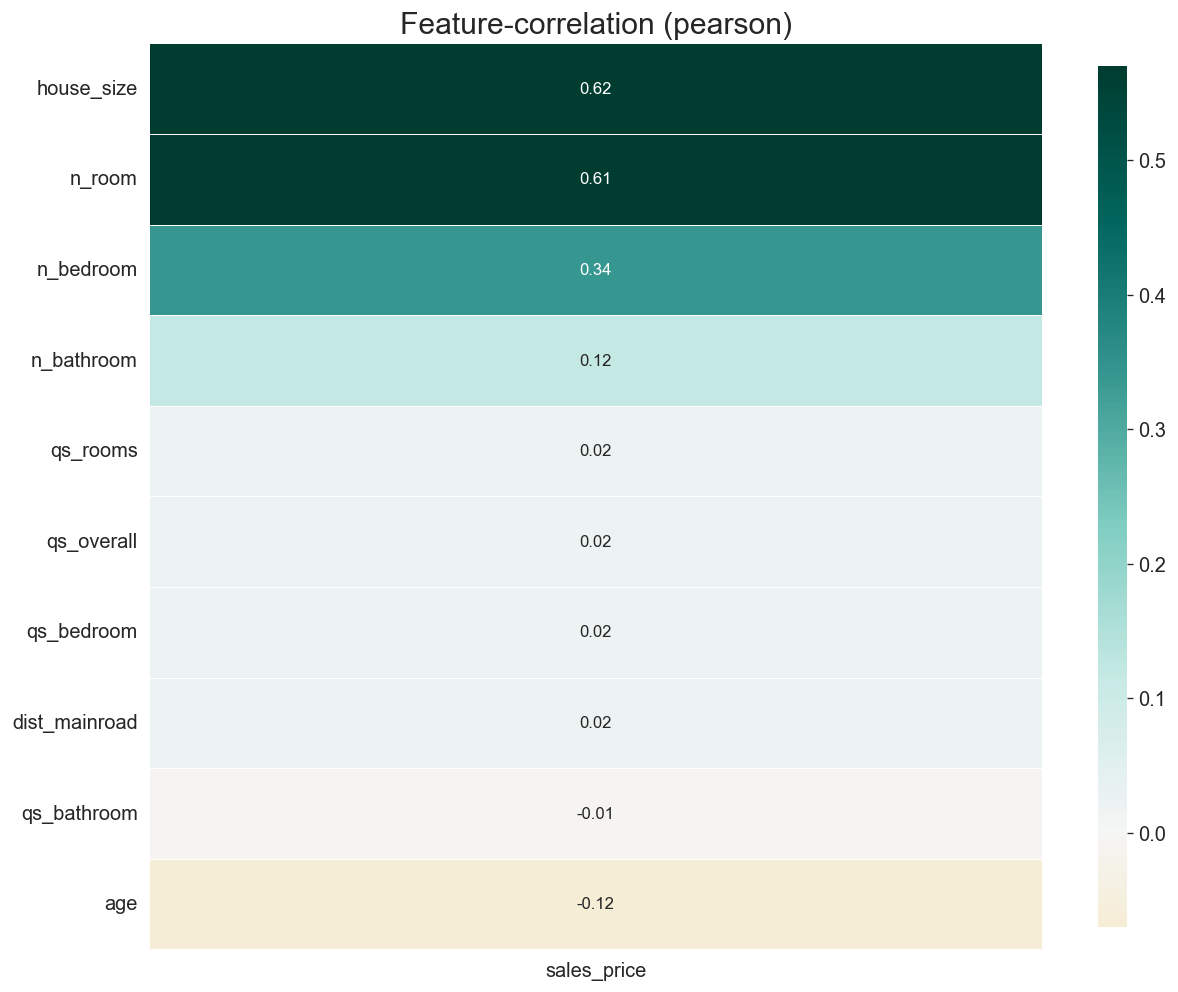

In [52]:
# Feature correlation 
klib.corr_plot(data, target='sales_price');

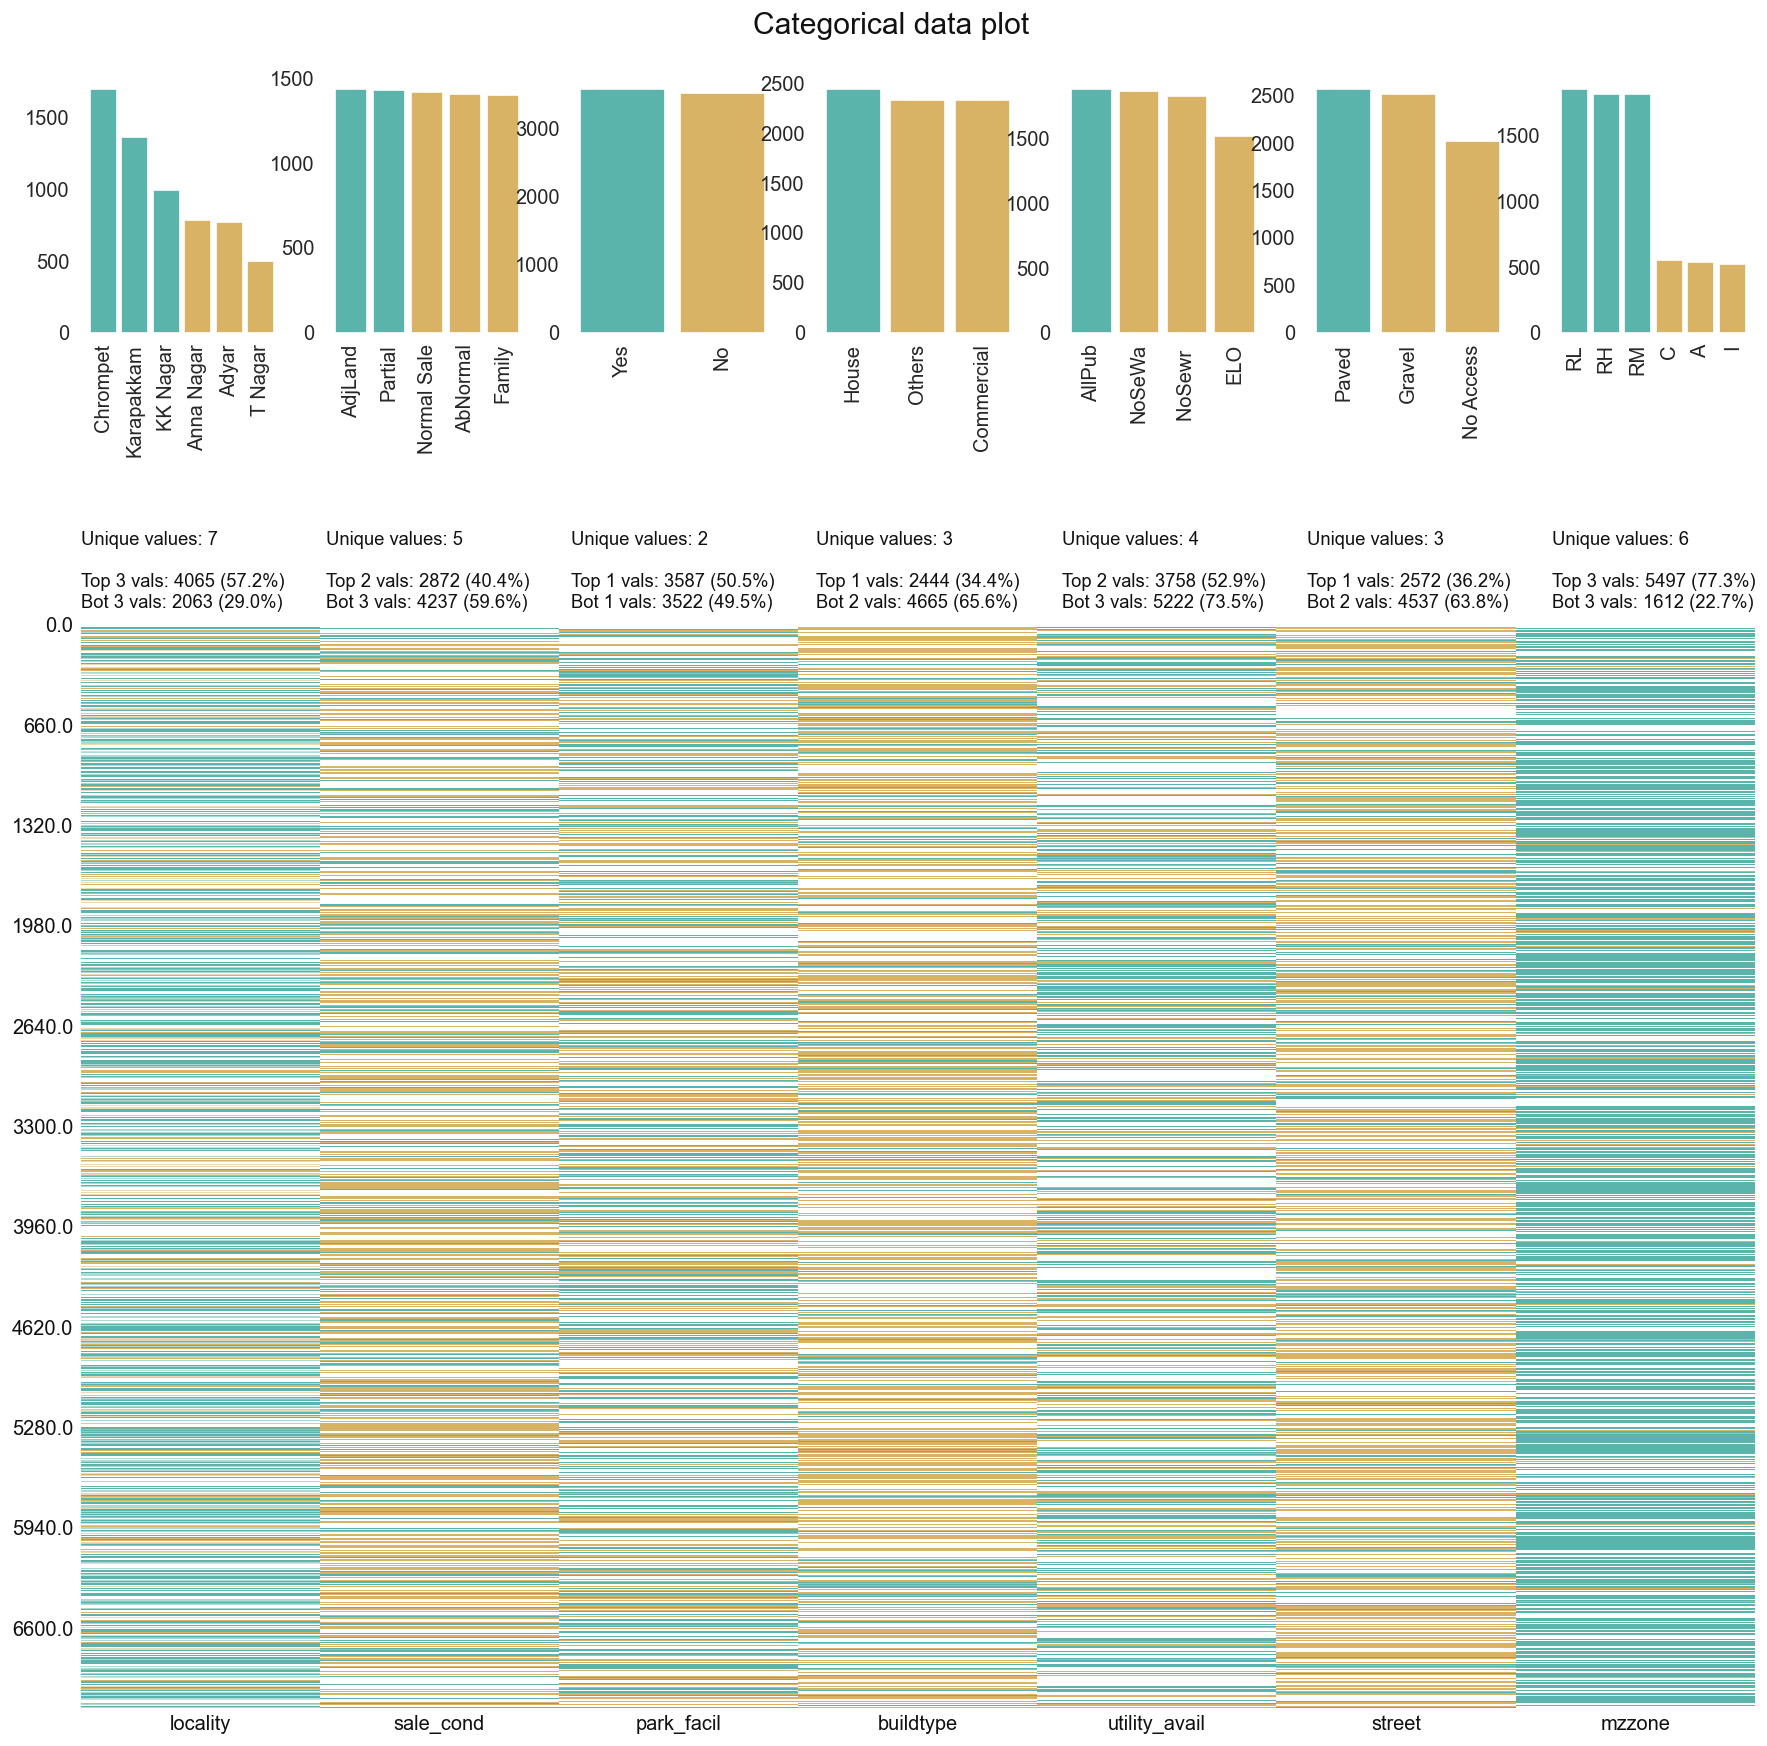

In [53]:
# new data frame with categorical columns
df1 = data.select_dtypes(exclude=['int64','float64','datetime64'])

# Over all view of categorical columns
klib.cat_plot(df1);

## 1. Locality


In [54]:
# unique values in area 

data.locality.nunique()

7

In [55]:
# value counts
area_df = house_data.locality.value_counts().reset_index(name='count')#.rename_axis('total')
area_df = area_df.rename_column('index', 'area')
area_df['percentage'] = round(area_df['count'] / data.shape[0] * 100, 2)
area_df

area  count  percentage
0    Chrompet   1702       23.94
1  Karapakkam   1366       19.22
2    KK Nagar    997       14.02
3   Velachery    981       13.80
4  Anna Nagar    788       11.08
5       Adyar    774       10.89
6     T Nagar    501        7.05

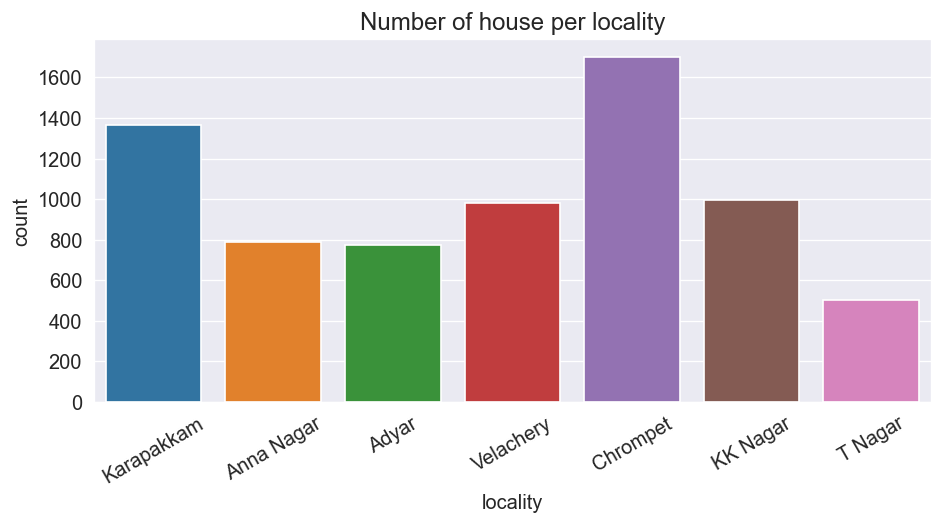

In [56]:
plt.figure(figsize=(9,4))
sns.countplot(x='locality', data=data)
plt.title("Number of house per locality")
plt.xticks(rotation=30)
plt.show()

- Chrompet has highest number of houses followed by Karapakkam,
- T Nagar has least number of houses.

In [57]:
order = data[['locality','sales_price']].groupby('locality').mean().sort_values('sales_price').reset_index()

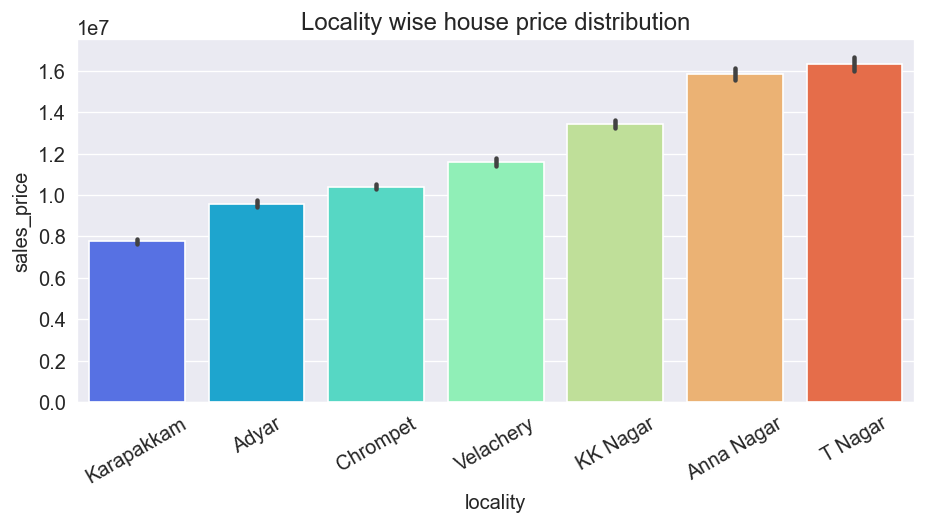

In [58]:
plt.figure(figsize=(9,4))
sns.barplot(x='locality', y='sales_price',data= data, palette='rainbow', order= data[['locality','sales_price']].groupby('locality').mean().sort_values('sales_price').reset_index().locality)
plt.xticks(rotation=30)
plt.title("Locality wise house price distribution")
plt.show()

- Locality wise house price follows a linear relationship. 
- Karapakkam has cheapest houses and T Nagar has expensive houses.

** Use label encoding

- Homes in `Anna Nagar` are selling in highest price followed by `T Nagar`, followed by `KK Nagar`.

- Though more number of houses are getting sold at `Chrompet`and `Karapakkam`; `Karapakkam` has cheapest houses followed by `Adyar` and `Chrompet`.

- This is may be due to low price of houses, most number of houses are getting sold in these areas in comparison to other areas.

- Though no. of house sold in `Anna Nagar` and `Adyar` are comparatively same, houses in `Adyar` are very cheaper in comparison to house price in `Anna Nagar`.

- Very minimum number of houses were sold in `T Nagar` in comparision to other areas, this might be due to their higher sales price.

- From the above box plot if we consider `Karapakkam` as cheapest are and `T Nagar`, `Anna Nagar` along with `KK Nagar` are expensive areas, then we can say that `Adyar`, `Velachery` and `Chrompet` are medium price range areas to buy house.

### Q. What are the possible reasons that make `Karapakkam` cheapest where as `T Nagar` and `Anna Nagar` are expensive areas to buy a house?

- To find the answer, we have two options 
    - To check relationship between area and other attributes
    - Or to make a pivot table and do some brainstorming.

we should go with the later one.

In [59]:
data.head()

locality  house_size  dist_mainroad  n_bedroom  n_bathroom  n_room  \
0  Karapakkam        1004            131          1           1       3   
1  Anna Nagar        1986             26          2           1       5   
2       Adyar         909             70          1           1       3   
3   Velachery        1855             14          3           2       5   
4  Karapakkam        1226             84          1           1       3   

  sale_cond park_facil   buildtype utility_avail  street mzzone  qs_rooms  \
0  AbNormal        Yes  Commercial        AllPub   Paved      A       4.0   
1  AbNormal         No  Commercial        AllPub  Gravel     RH       4.9   
2  AbNormal        Yes  Commercial           ELO  Gravel     RL       4.1   
3    Family         No      Others       NoSewr    Paved      I       4.7   
4  AbNormal        Yes      Others        AllPub  Gravel      C       3.0   

   qs_bathroom  qs_bedroom  qs_overall  sales_price  age  
0          3.9         4.9       4.330      8124400   44  
1          4.2         2.5       3.765     22781941   11  
2          3.8         2.2       3.090     13672408   20  
3          3.9         3.6       4.010     10063653   22  
4          2.5         4.1       3.290      7717313   30

In [60]:
pv_with_numeric_cols = pd.pivot_table(
    data=data,
    index=['locality'],
    values= ['house_size','sales_price','dist_mainroad','n_bedroom','n_bathroom','n_room', 'qs_overall'],
    aggfunc=['mean', 'max', 'min', 'median'])

pv_with_numeric_cols

mean                                              \
           dist_mainroad   house_size n_bathroom n_bedroom    n_room   
locality                                                               
Adyar         101.332041   958.166667   1.170543  1.170543  2.895349   
Anna Nagar    100.661168  1752.998731   1.000000  1.398477  4.398477   
Chrompet       98.133373  1003.254994   1.000000  1.165100  3.002938   
KK Nagar      100.700100  1903.332999   1.595787  2.811434  4.811434   
Karapakkam    101.028551  1103.406296   1.308931  1.308931  2.992679   
T Nagar       103.516966  1759.576846   1.000000  1.449102  4.449102   
Velachery      94.840979  1741.293578   1.374108  2.374108  4.374108   

                                              max                        \
           qs_overall   sales_price dist_mainroad house_size n_bathroom   
locality                                                                  
Adyar        3.498676  9.580581e+06           200       1300          2   
Anna Nagar   3.497143  1.584423e+07           200       2000          1   
Chrompet     3.495697  1.040800e+07           200       1300          1   
KK Nagar     3.528918  1.341933e+07           200       2500          2   
Karapakkam   3.491567  7.755477e+06           200       1699          2   
T Nagar      3.528938  1.632265e+07           200       2000          1   
Velachery    3.501945  1.158841e+07           200       2000          2   

                                                             min             \
           n_bedroom n_room qs_overall sales_price dist_mainroad house_size   
locality                                                                      
Adyar              2      4       4.87    18159051             0        600   
Anna Nagar         2      5       4.82    24788923             0       1501   
Chrompet           2      4       4.90    16662246             0        700   
KK Nagar           4      6       4.83    21461141             0       1300   
Karapakkam         2      4       4.94    15297480             0        500   
T Nagar            2      5       4.97    24969043             0       1502   
Velachery          3      5       4.93    19341737             0       1500   

                                                                     median  \
           n_bathroom n_bedroom n_room qs_overall sales_price dist_mainroad   
locality                                                                      
Adyar               1         1      2      2.000     4047163            98   
Anna Nagar          1         1      4      2.195     9970890           103   
Chrompet            1         1      2      2.060     5517150            98   
KK Nagar            1         1      3      2.180     7928914            99   
Karapakkam          1         1      2      2.200     2253935           101   
T Nagar             1         1      4      2.090     9933592           108   
Velachery           1         2      4      2.220     5830822            90   

                                                                          
           house_size n_bathroom n_bedroom n_room qs_overall sales_price  
locality                                                                  
Adyar           953.5          1         1      3      3.510   9268182.5  
Anna Nagar     1756.0          1         1      4      3.503  14305714.0  
Chrompet       1008.0          1         1      3      3.500   9985547.0  
KK Nagar       1911.0          2         3      5      3.540  12834705.0  
Karapakkam     1114.0          1         1      3      3.480   7439757.5  
T Nagar        1778.0          1         1      4      3.525  14687605.0  
Velachery      1738.0          1         2      4      3.500  10992759.0

- These numerical columns doesn't make any sense with the are and price relationship.
- Let's check categorical columns

In [61]:
pv_with_cat_cols = pd.pivot_table(
    data=data,
    index=['locality','buildtype','utility_avail','street'],
    values=['sales_price'],
    aggfunc=['max','min', 'median'])



In [62]:
pv_with_cat_cols.transpose()

locality                 Adyar                                      \
buildtype           Commercial                                       
utility_avail           AllPub                                 ELO   
street                  Gravel   No Access       Paved      Gravel   
max    sales_price  18159051.0  15599007.0  14709195.0  16574854.0   
min    sales_price  10241972.0   6710088.0   8527268.0   9236397.0   
median sales_price  12610177.0  11459349.0  11104429.0  12116936.0   

locality                                                            \
buildtype                                                            
utility_avail                                   NoSeWa               
street               No Access       Paved      Gravel   No Access   
max    sales_price  15760335.0  16864527.0  16183782.0  13760521.0   
min    sales_price   8225776.0   8714953.0   9140092.0   6284309.0   
median sales_price  11618707.0  11061745.0  12454890.0  10777409.0   

locality                                                            \
buildtype                                                            
utility_avail                      NoSewr                            
street                   Paved      Gravel   No Access       Paved   
max    sales_price  17339969.0  17494542.0  13320971.0  15210626.0   
min    sales_price   8821520.0   9198019.0   7607303.0  10093761.0   
median sales_price  12487175.0  12666674.5  11636986.0  11958857.0   

locality                                                            \
buildtype                House                                       
utility_avail           AllPub                                 ELO   
street                  Gravel   No Access       Paved      Gravel   
max    sales_price  11521301.0  11319518.0  10460088.0  11934321.0   
min    sales_price   5816193.0   4672400.0   5717852.0   5290115.0   
median sales_price   8460315.0   8283402.0   9004832.5   8202184.0   

locality                                                                       \
buildtype                                                                       
utility_avail                                   NoSeWa                          
street               No Access       Paved      Gravel  No Access       Paved   
max    sales_price  10513503.0  10467778.0  11210734.0  9910168.0  11294830.0   
min    sales_price   5289815.0   4616003.0   6445119.0  5893894.0   5983779.0   
median sales_price   8217985.5   8499378.0   9490994.0  7259045.0   8328699.0   

locality                                                            \
buildtype                                                   Others   
utility_avail          NoSewr                               AllPub   
street                  Gravel   No Access       Paved      Gravel   
max    sales_price  10105089.0  11371537.0  11109848.0  12303434.0   
min    sales_price   6075240.0   4047163.0   5201266.0   5917784.0   
median sales_price   8394691.5   7927228.5   7727239.0   8997027.5   

locality                                                            \
buildtype                                                            
utility_avail                                      ELO               
street               No Access       Paved      Gravel   No Access   
max    sales_price  12269035.0  12200656.0  11745479.0  11318359.0   
min    sales_price   4870547.0   6161547.0   5777643.0   5106748.0   
median sales_price   7415865.0   8787434.5   8574516.5   7997863.5   

locality                                                            \
buildtype                                                            
utility_avail                       NoSeWa                           
street                   Paved      Gravel   No Access       Paved   
max    sales_price  11679787.0  12253523.0  10883114.0  11310905.0   
min    sales_price   5256862.0   5551042.0   4630081.0   4813873.0   
median sales_price   8677972.0   8997674.0   8598124.0   8216558.5

In [63]:
pv_with_cat_cols['max'].idxmax()

sales_price    (T Nagar, Commercial, AllPub, Gravel)
dtype: object

In [64]:
pv_with_cat_cols['min'].idxmax()

sales_price    (T Nagar, Commercial, NoSewr , Gravel)
dtype: object

In [65]:
pv_with_cat_cols['max'].idxmin()

sales_price    (Karapakkam, House, AllPub, No Access)
dtype: object

In [66]:
pv_with_cat_cols['min'].idxmin()

sales_price    (Karapakkam, Others, ELO, No Access)
dtype: object

In [67]:
pv_with_cat_cols['median'].median()

sales_price    11618217.0
dtype: float64

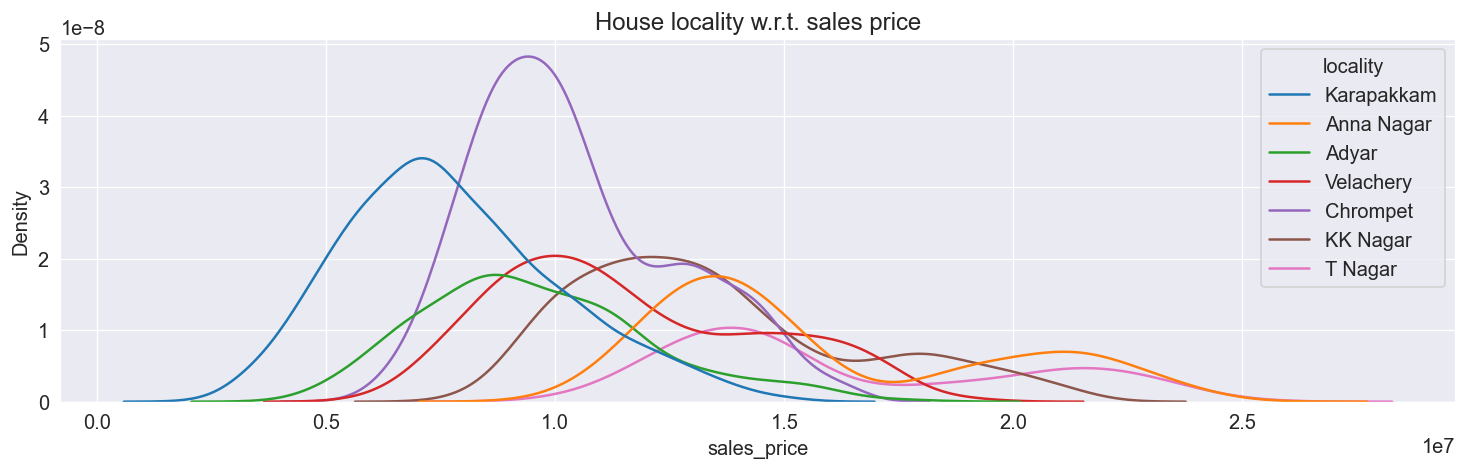

In [68]:
plt.figure(figsize=(15,4))
sns.kdeplot('sales_price',data=data, hue='locality')
plt.title("House locality w.r.t. sales price")
plt.show()

- It seems that the building type and available utilities effects the house price.

- Buildings with commercial build type and with all public facilities are very expensive.

- In `Karapakkam` the streets have limited or no access, which causes the house price to drop.

- Houses near to `Gravel` type of street come with highest price, followed by `paved` roads.

- Streets with no access gets less value.

In [69]:
in_relation_with_buildtype = pd.pivot_table(
    data=data,
    index=['locality','buildtype'],
    values=['sales_price'],
    aggfunc=['max','min','median']
)

in_relation_with_buildtype

max         min      median
                      sales_price sales_price sales_price
locality   buildtype                                     
Adyar      Commercial    18159051     6284309  11779305.0
           House         11934321     4047163   8287534.0
           Others        12316175     4630081   8531663.5
Anna Nagar Commercial    24788923    16431463  20926338.0
           House         15877111     9970890  12914884.0
           Others        17550229    10613913  13985029.0
Chrompet   Commercial    16662246     8353537  12951647.0
           House         12319008     5517150   8873583.0
           Others        13262273     6109490   9520949.0
KK Nagar   Commercial    21461141    11851056  17128181.0
           House         15188530     7928914  11229276.0
           Others        15451900     8288560  12189174.0
Karapakkam Commercial    15297480     3294720   9852118.0
           House         10576954     2796025   6634260.5
           Others        11740212     2253935   7053637.0
T Nagar    Commercial    24969043    17017471  21244954.0
           House         16389120     9933592  13252150.5
           Others        17688256    10943862  14388963.0
Velachery  Commercial    19341737    10963454  14936243.0
           House         12933846     5830822   9469530.0
           Others        13328714     6342070  10153765.0

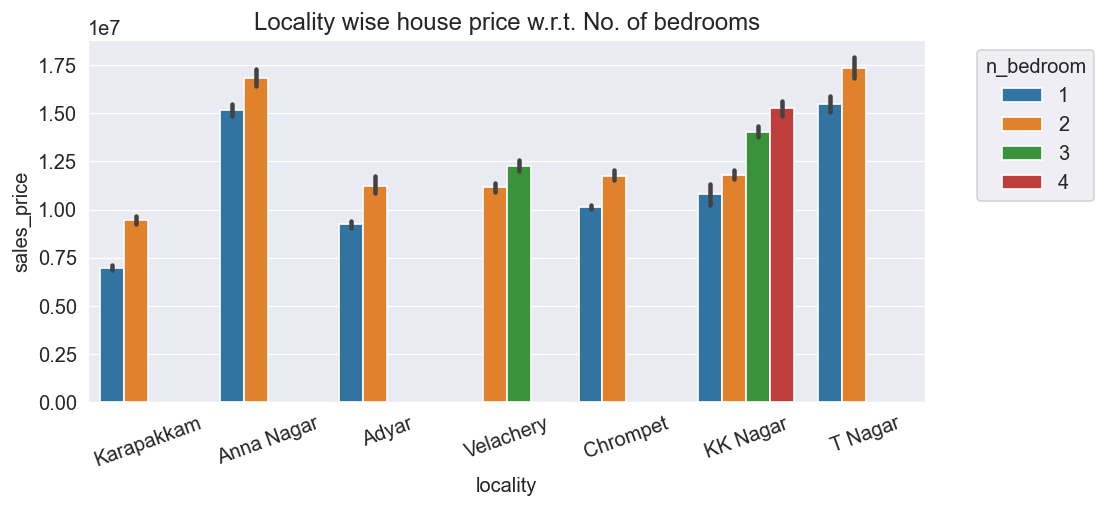

In [70]:
plt.figure(figsize=(9,4))
sns.barplot(x='locality',y='sales_price', data=data, hue='n_bedroom')
plt.title("Locality wise house price w.r.t. No. of bedrooms")
plt.xticks(rotation=20)
plt.legend(title='n_bedroom',bbox_to_anchor=(1.05,1))
plt.show()

- Most of areas have single bedroom houses.
- Karapakkam is the only area to have houses with 4 bedrooms.
- Valachery has no single bedroom house.

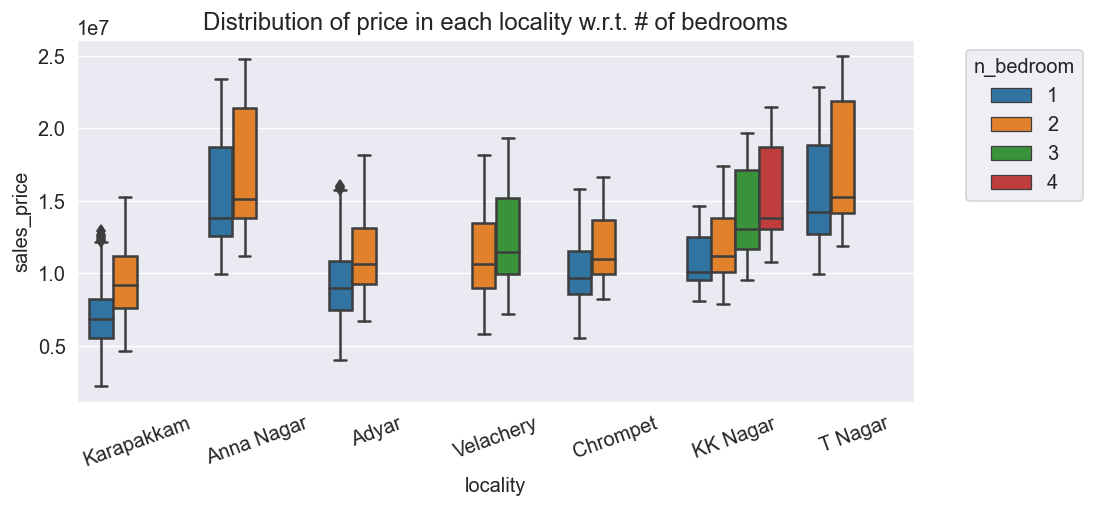

In [71]:
plt.figure(figsize=(9,4))
sns.boxplot(x='locality',y='sales_price', data=data, hue='n_bedroom')
plt.xticks(rotation=20)
plt.title("Distribution of price in each locality w.r.t. # of bedrooms")
plt.legend(title="n_bedroom", bbox_to_anchor=(1.05,1))
plt.show()

- Anna Nagar and T Nagar has highest price houses.
- KK Nagar has 4 bedroom houses but their price is comparatively lower to 2 bedroom houses in Anna Nagar and T-Nagar.


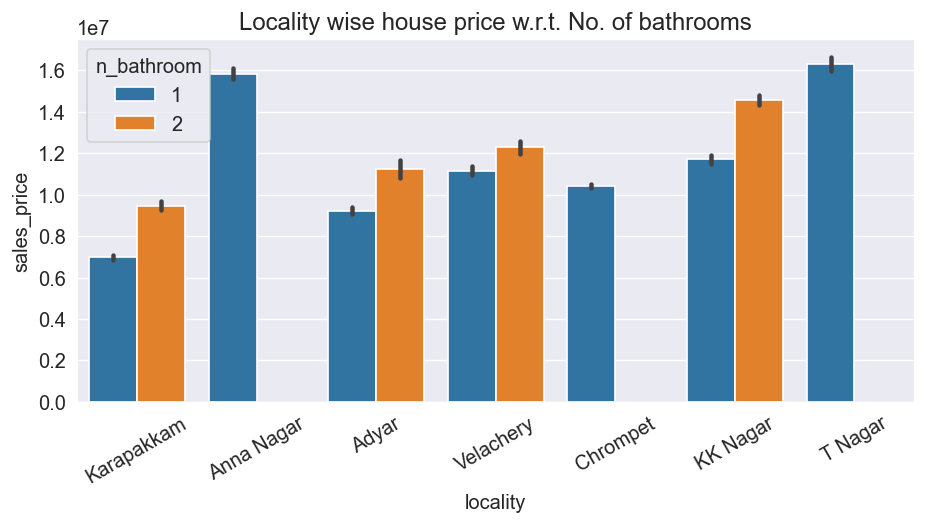

In [72]:
plt.figure(figsize=(9,4))
sns.barplot(x='locality',y='sales_price', data=data, hue='n_bathroom')
plt.title("Locality wise house price w.r.t. No. of bathrooms")
plt.xticks(rotation=30)
plt.show()

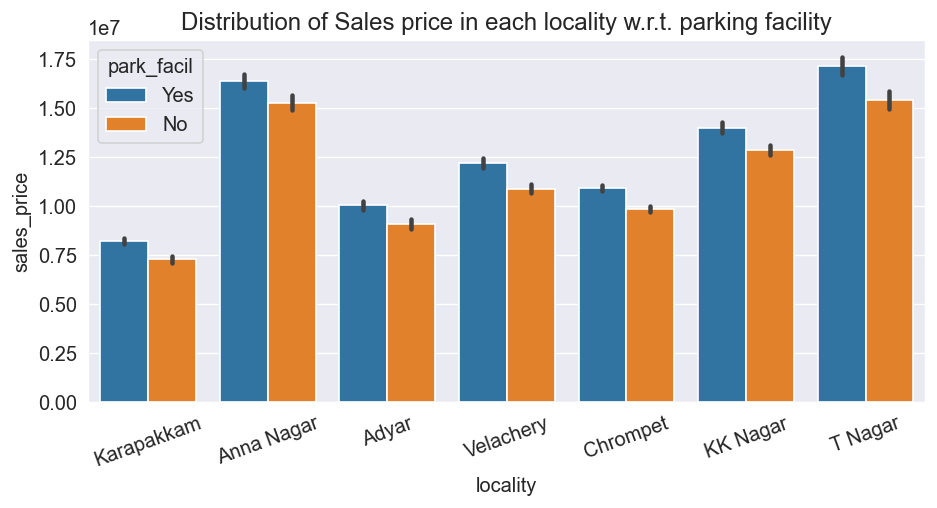

In [73]:
plt.figure(figsize=(9,4))
sns.barplot(x='locality', y='sales_price', data=data, hue='park_facil')
plt.xticks(rotation=20)
plt.title("Distribution of Sales price in each locality w.r.t. parking facility")
plt.show()

- All the areas have parking facility houses, in fact, parking facility houses are more in number in comparison to houses with no parking facility.

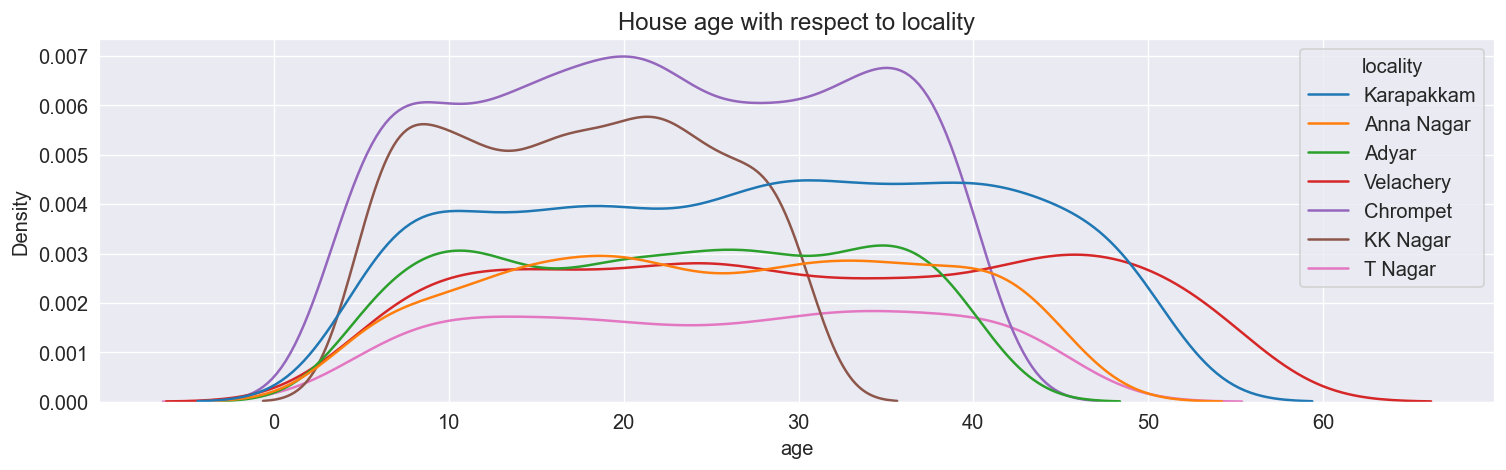

In [74]:
plt.figure(figsize=(15,4))
sns.kdeplot('age', hue='locality', data=data)
plt.title("House age with respect to locality")
plt.show()

- Velachery has more old houses.

- KK Nagar has more young houses.

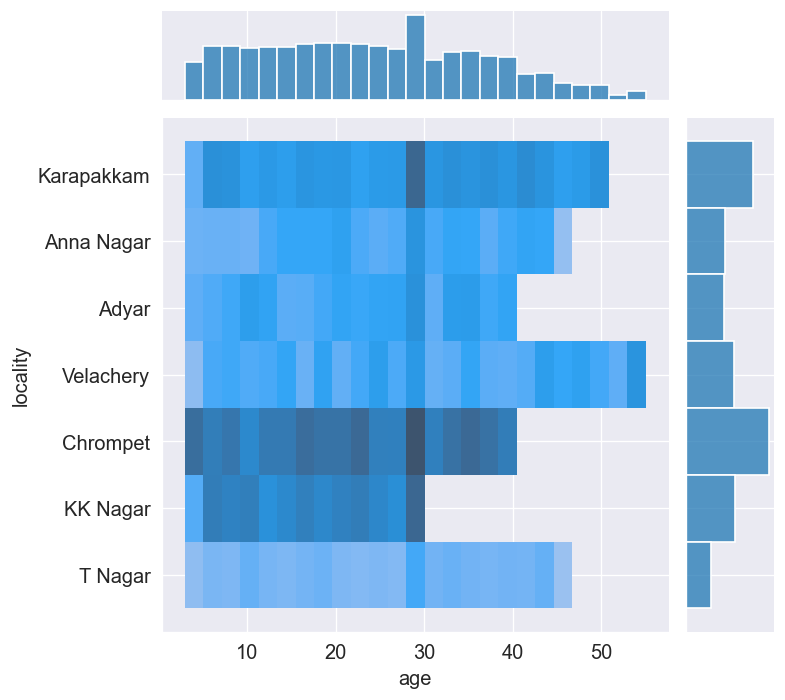

In [75]:
sns.jointplot(x='age', y='locality', data=data, kind='hist');

- KK Nagar has houses under 30 years old, Velachery has more older houses more than 50 years old.

- The dataset has less number of houses with age more than 40. More number of houses are of 30 years old.

## House size

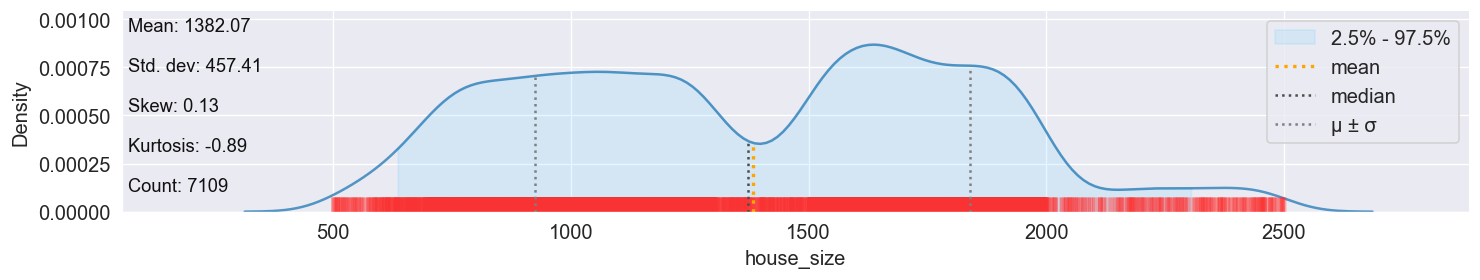

In [76]:
klib.dist_plot(data['house_size']);

- Average house size is 1382 sq ft. 

- House size is not normally distributed.

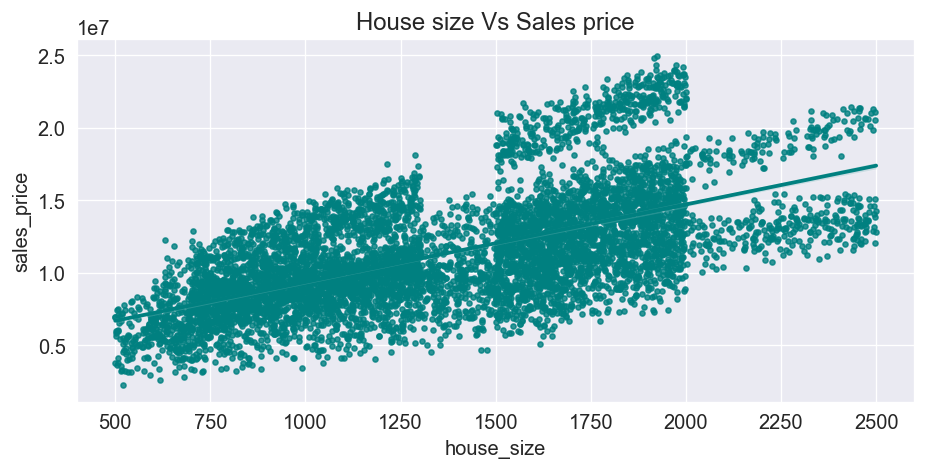

In [77]:
plt.figure(figsize=(9,4))
sns.regplot(x='house_size', y='sales_price', data=data, marker='.', color='teal')
plt.title("House size Vs Sales price")
plt.show()

- House size has linear relationship with Sales price.

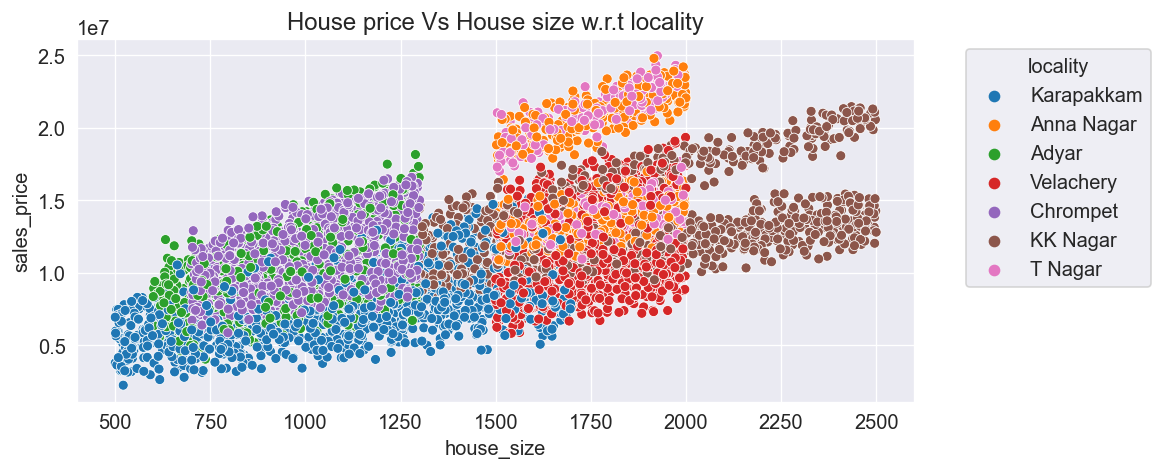

In [78]:
plt.figure(figsize=(9,4))
sns.scatterplot(data=data, x='house_size', y='sales_price', hue='locality')
plt.title("House price Vs House size w.r.t locality")
plt.legend(title='locality',bbox_to_anchor=(1.05, 1))
plt.show()

- House size follows linear relationship with house price.
- KK Nagar houses are comparatively bigger in size than houses in other areas.
- Karapakkam, Adyar has lower size houses.

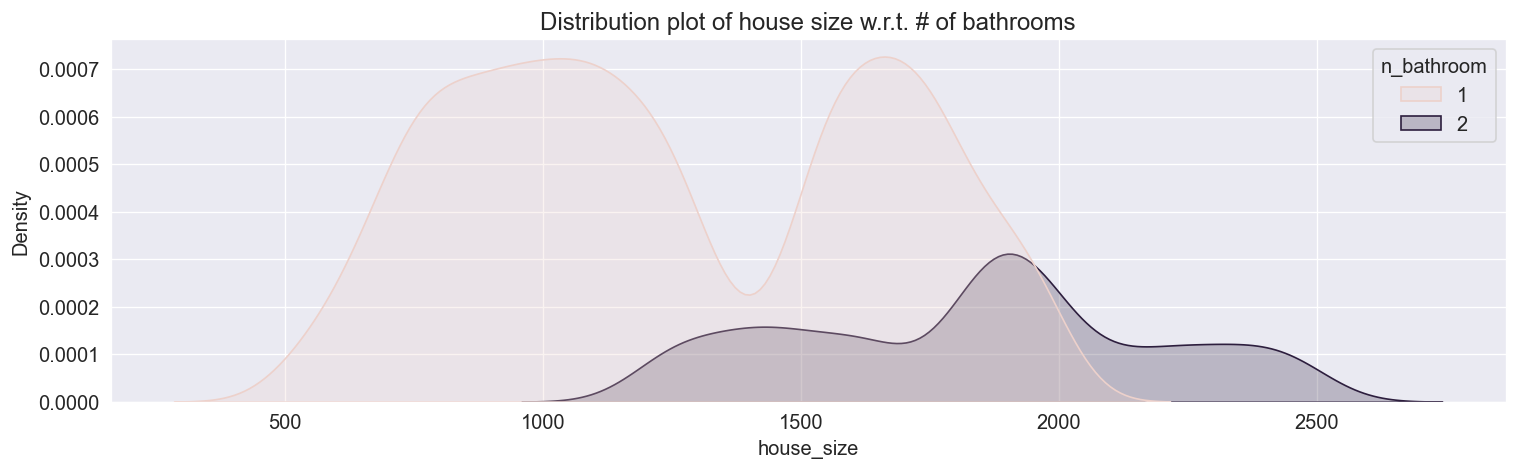

In [79]:
plt.figure(figsize=(15,4))
sns.kdeplot('house_size', hue='n_bathroom', data=data, shade=True)
plt.title("Distribution plot of house size w.r.t. # of bathrooms")
plt.show()

- Houses with single bathroom belongs to an size of 500 to 2000 sq ft.
- Whereas, the houses with dual bathroom are bigger in size ranging from 1000 sq ft to 2500+ sq ft.

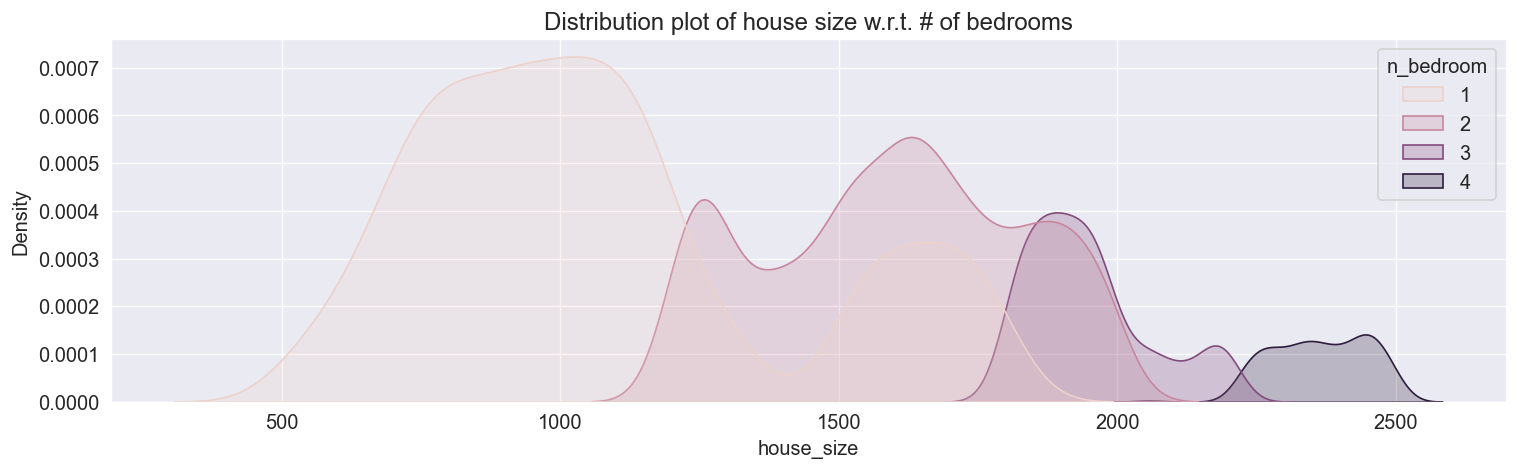

In [80]:
plt.figure(figsize=(15,4))
sns.kdeplot('house_size', hue='n_bedroom', data=data, shade=True )
plt.title("Distribution plot of house size w.r.t. # of bedrooms")
plt.show()

- Houses with single bedroom are of size 500 sq ft to 2000 sq ft. where as most houses lie in 500 - 1500 sq ft range.
- Houses with double bedroom ranges from 1100 sq ft to 2300 sq ft range, whereas, triple bedroom houses are of only 1700 sq ft to 2100 sq ft.

- Houses with 4 bedrooms are of size 2100 sqft to 2500 sq ft.


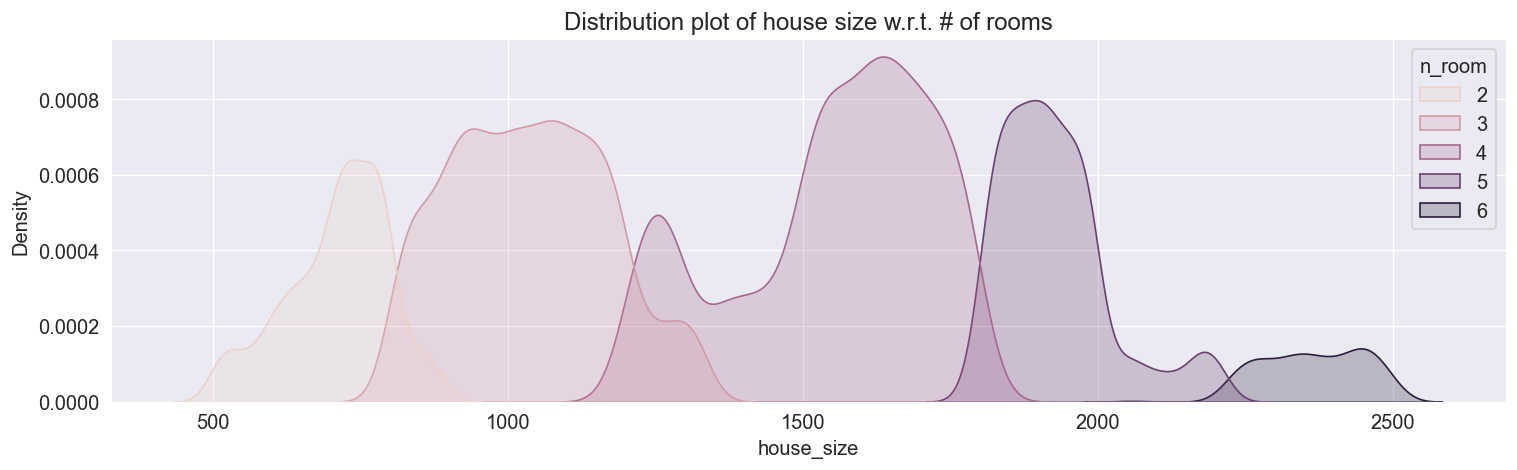

In [81]:
plt.figure(figsize=(15,4))
sns.kdeplot('house_size', hue='n_room', data=data, shade=True )
plt.title("Distribution plot of house size w.r.t. # of rooms")
plt.show()

From the above plot we can see that,
- Very few houses has 6 rooms and 2 rooms.
- Most houses are having 4 rooms followed by 3 rooms.


### 3. Distance from Main Road (dist_mainroad)

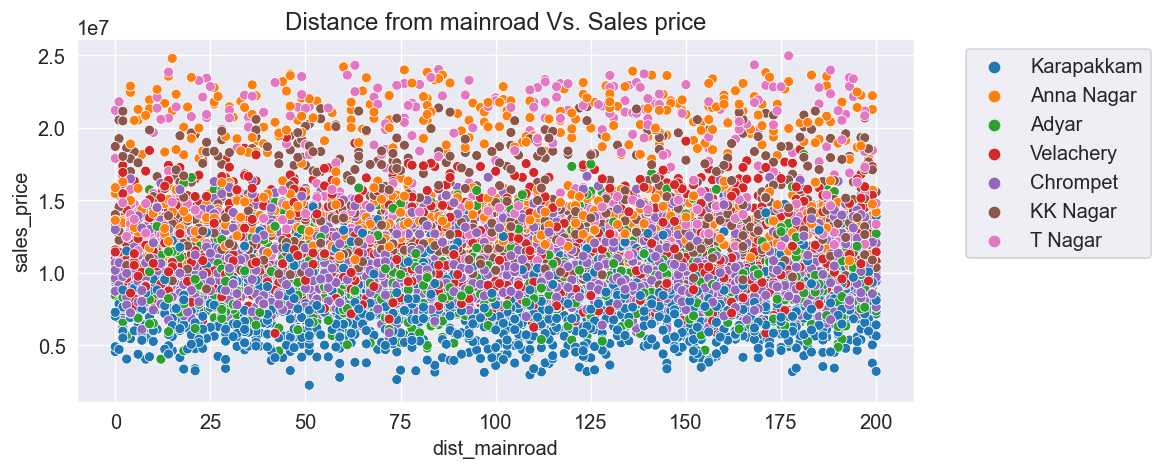

In [82]:
plt.figure(figsize=(9,4))
sns.scatterplot(x='dist_mainroad',y='sales_price', data=data, hue='locality')
plt.title("Distance from mainroad Vs. Sales price")
plt.legend(bbox_to_anchor=(1.05, 1))
plt.show()

- Uniform distribution, can drop this feature.

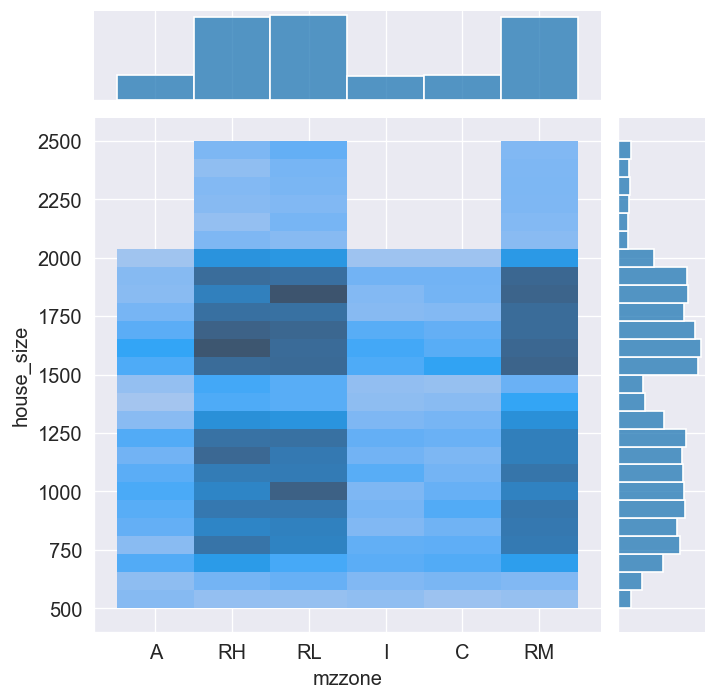

In [83]:
sns.jointplot(x='mzzone', y='house_size', data=data, kind='hist');

- Distance of home from main roads does not affect the sales price much.

### No of Rooms

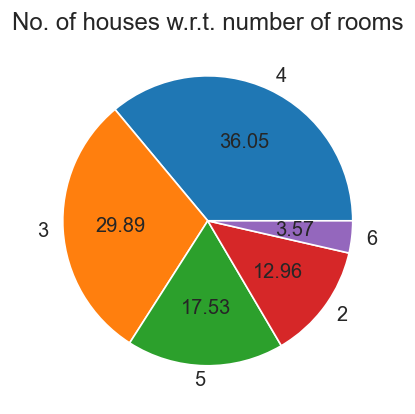

In [84]:
data.n_room.value_counts().plot(kind='pie', autopct="%.2f", figsize=(9,4))
plt.title("No. of houses w.r.t. number of rooms")
plt.ylabel('')
plt.show()

In [85]:
order = data[['n_room','sales_price']].groupby('n_room').mean().sort_values('sales_price').reset_index()
order

n_room   sales_price
0       2  7.311581e+06
1       3  9.705458e+06
2       4  1.225463e+07
3       5  1.483657e+07
4       6  1.527924e+07

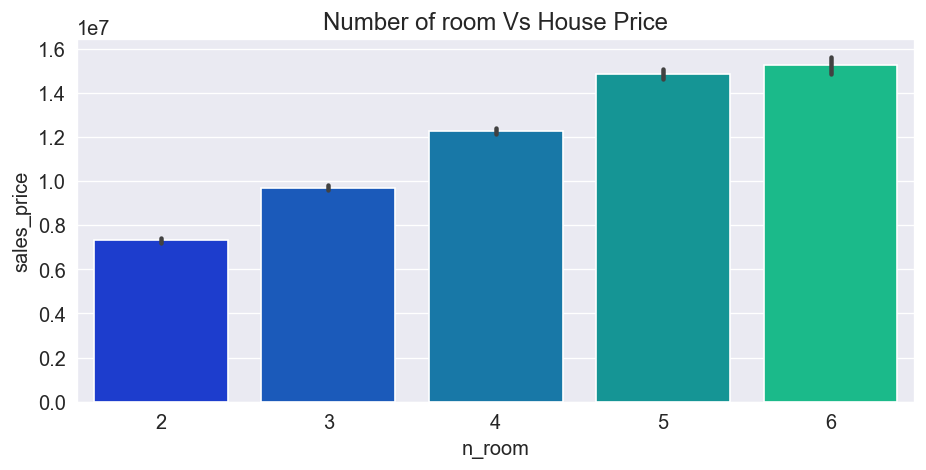

In [86]:
plt.figure(figsize=(9,4))
sns.barplot(data=data, x='n_room',y='sales_price', order=order.n_room, palette='winter')
plt.title("Number of room Vs House Price")
plt.show()

- With increase in room number, house price increase. Follows a linear trend.

- The above pie plot evident that people are interested in house with 4 number of rooms followed by 3 rooms.

- `Anna Nagar`, `Velachery`, `KK Nagar`, and `T Nagar` has houses more with more than 4 rooms.

- `KK Nagar` is the only place to have houses with 6 rooms.

- `Chrompet` has highest number of houses sold with 3 rooms.


### No of Bedrooms

- Its a categorical value column.

In [87]:
data.n_bedroom.value_counts()

1    3796
2    2352
3     707
4     254
Name: n_bedroom, dtype: int64

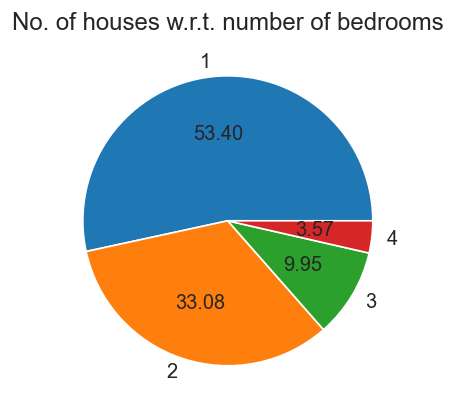

In [88]:

data.n_bedroom.value_counts().plot(kind='pie', autopct="%.2f", figsize=(9,4))
plt.title("No. of houses w.r.t. number of bedrooms")
plt.ylabel('')
plt.show()

- 3796 (53.4%) houses in the dataset has single bedroom. Whereas, only 254 (3.57%) houses has 4 bedrooms.

In [89]:
order = data[['n_bedroom','sales_price']].groupby('n_bedroom').mean().sort_values('sales_price').reset_index()
# order['n_bedroom'] = order.n_bedroom.astype('str')

order

n_bedroom   sales_price
0          1  1.022734e+07
1          2  1.239016e+07
2          3  1.313775e+07
3          4  1.527924e+07

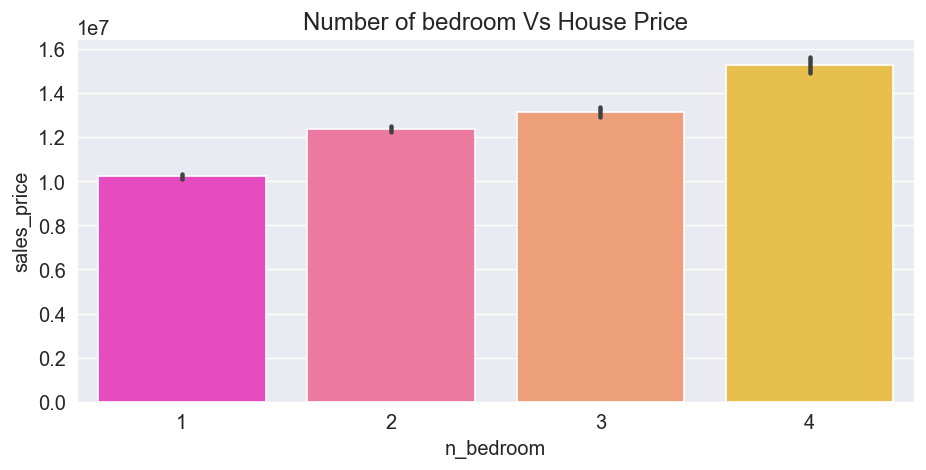

In [90]:
plt.figure(figsize=(9,4))
sns.barplot(data=data, x='n_bedroom',y='sales_price', order=order.n_bedroom, palette='spring')
plt.title("Number of bedroom Vs House Price")
plt.show()

- Number of bedrooms and house price follows a linear trend.

In [91]:
# The above picture can be represented as
data.groupby(['n_room', 'n_bedroom'])['n_bedroom'].count()

n_room  n_bedroom
2       1             921
3       1            2125
4       1             750
        2            1813
5       2             539
        3             707
6       4             254
Name: n_bedroom, dtype: int64

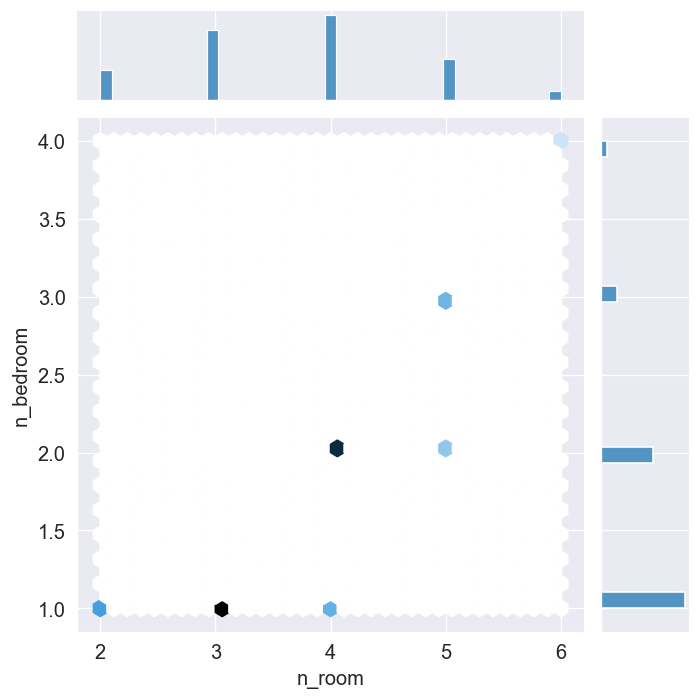

In [92]:
sns.jointplot(x='n_room',y='n_bedroom', data=data, kind='hex')
plt.show()

- In the dataset, most houses has 3 or 4 rooms, in case a house with 3 rooms, only bedroom is present, where as in case of 4 room houses, 2 bedrooms are present.

- Houses with 5 rooms has 2 and 3 bedrooms and houses with 6 rooms has 4 bedrooms.

In [93]:
locality_wise_bedroom= data.groupby(['locality', 'n_room', 'n_bedroom'])['n_bedroom'].count().to_frame(name='count')
locality_wise_bedroom

count
locality   n_room n_bedroom       
Adyar      2      1            213
           3      1            429
           4      2            132
Anna Nagar 4      1            474
           5      2            314
Chrompet   2      1            276
           3      1           1145
           4      2            281
KK Nagar   3      1             39
           4      2            364
           5      3            340
           6      4            254
Karapakkam 2      1            432
           3      1            512
           4      2            422
T Nagar    4      1            276
           5      2            225
Velachery  4      2            614
           5      3            367

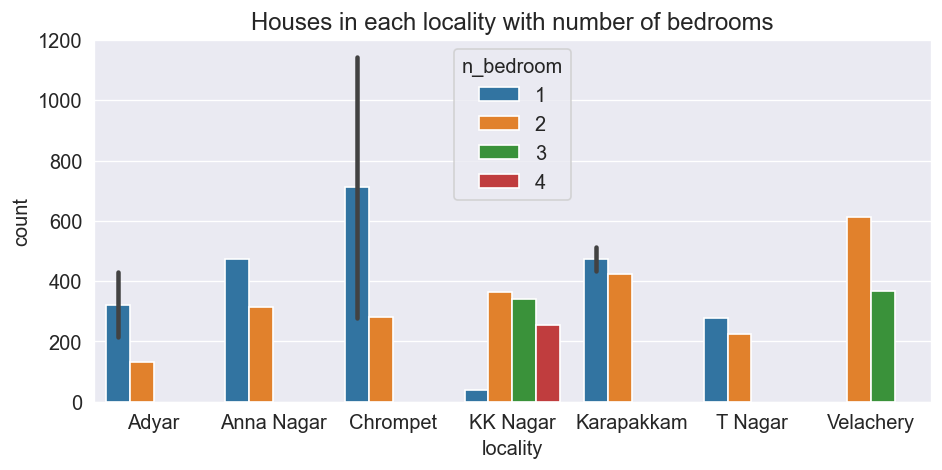

In [94]:
plt.figure(figsize=(9,4))
sns.barplot(data=locality_wise_bedroom.reset_index(), x='locality', y='count', hue='n_bedroom')
plt.title("Houses in each locality with number of bedrooms")
plt.show()

- Chrompet has highest number of houses with 3 rooms, but most of them are single bedroom.

### No. of Bathrooms


- It is also a categorical column

In [95]:
data.n_bathroom.value_counts()

1    5594
2    1515
Name: n_bathroom, dtype: int64

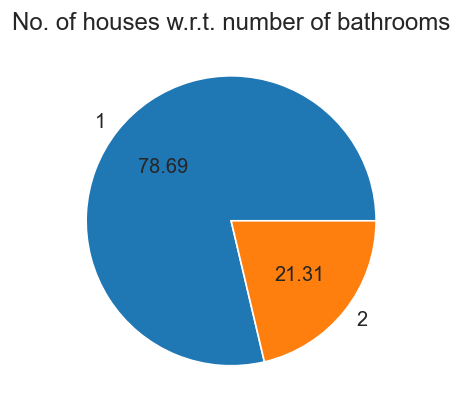

In [96]:
data.n_bathroom.value_counts().plot(kind='pie', autopct="%.2f", figsize=(9,4))
plt.title("No. of houses w.r.t. number of bathrooms")
plt.ylabel('')
plt.show()

- More houses have single bathroom. 

In [97]:
locality_wise_bathroom= data.groupby(['locality', 'n_room', 'n_bathroom'])['n_bathroom'].count().to_frame(name='count')
locality_wise_bathroom

count
locality   n_room n_bathroom       
Adyar      2      1             213
           3      1             429
           4      2             132
Anna Nagar 4      1             474
           5      1             314
Chrompet   2      1             276
           3      1            1145
           4      1             281
KK Nagar   3      1              39
           4      1             364
           5      2             340
           6      2             254
Karapakkam 2      1             432
           3      1             512
           4      2             422
T Nagar    4      1             276
           5      1             225
Velachery  4      1             614
           5      2             367

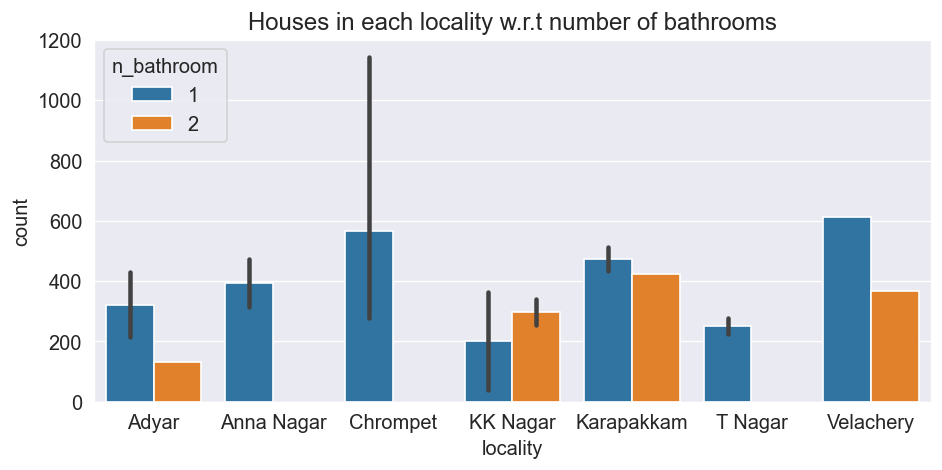

In [98]:
plt.figure(figsize=(9,4))
sns.barplot(data=locality_wise_bathroom.reset_index(), x='locality', y='count', hue='n_bathroom')
plt.title("Houses in each locality w.r.t number of bathrooms")
plt.show()

- Anna Nagar, Chrompet and T Nagar has no houses with double bathrooms.

- KK Nagar has more number of houses with double bathrooms.

In [99]:
data.groupby(['n_room', 'n_bathroom'])['n_bathroom'].count()

n_room  n_bathroom
2       1              921
3       1             2125
4       1             2009
        2              554
5       1              539
        2              707
6       2              254
Name: n_bathroom, dtype: int64

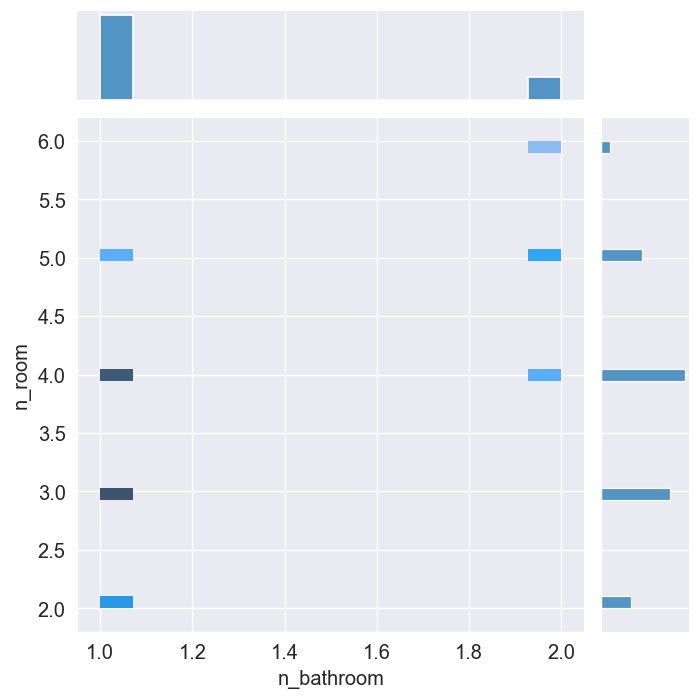

In [100]:
sns.jointplot(x='n_bathroom',y='n_room', data=data, kind='hist')
plt.show()

- The above plot show that houses with 4 rooms and above has double bathrooms.

### Sale Condition

In [101]:
data.sale_cond.value_counts()

AdjLand        1439
Partial        1433
Normal Sale    1423
AbNormal       1411
Family         1403
Name: sale_cond, dtype: int64

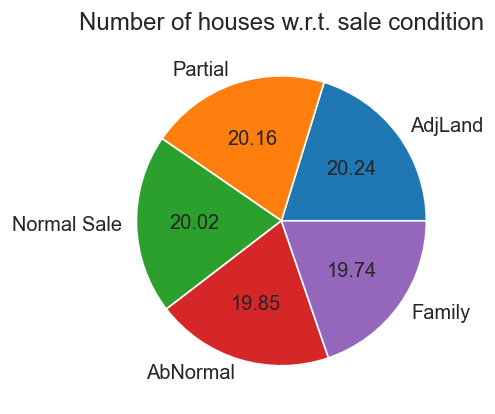

In [102]:
data.sale_cond.value_counts().plot(kind='pie', autopct="%.2f", figsize=(9,4))
plt.ylabel('')
plt.title("Number of houses w.r.t. sale condition")
plt.show()

- The different types of sale conditions are not much significant, however, sale condition as AdjLand has highest number of houses, and family type sales are less.

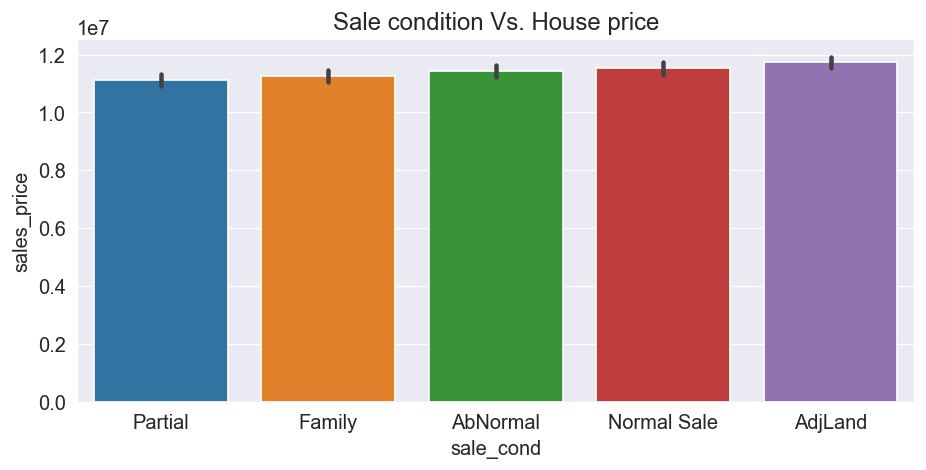

In [103]:
plt.figure(figsize=(9,4))
sns.barplot(x='sale_cond', y='sales_price', data=data, order=data[['sale_cond','sales_price']].groupby('sale_cond').mean().sort_values('sales_price').reset_index().sale_cond)
plt.title("Sale condition Vs. House price")
plt.show()

- Sale condition of house with respect to house price follows a linear trend.

- Adjacent lands are of highest price, where as partially sold houses has less price.

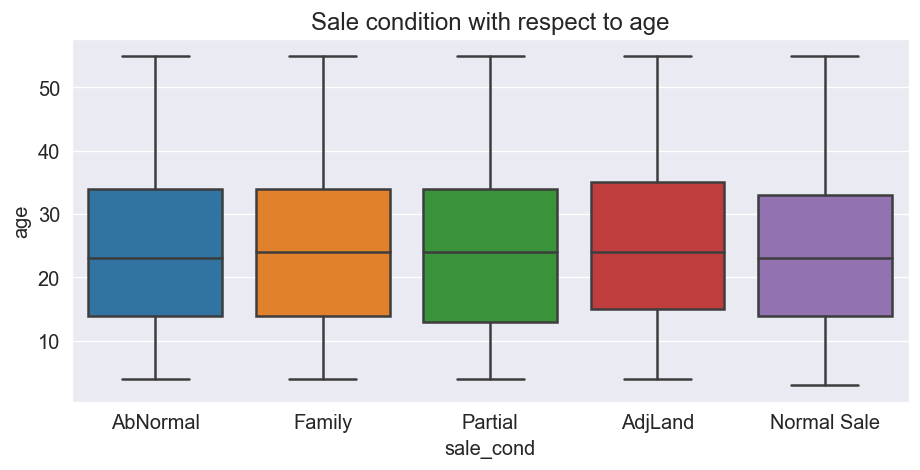

In [104]:
# Is there any relation between sale condition and age
plt.figure(figsize=(9,4))
sns.boxplot(x='sale_cond', y='age', data=data)
plt.title("Sale condition with respect to age")
plt.show()

- Sale condition w.r.t. house age is not much different from each other. Equally linearly distributed.

In [105]:
data[['sale_cond','house_size']].groupby('sale_cond').mean().sort_values('house_size')

house_size
sale_cond               
Family       1373.263008
AdjLand      1378.141765
AbNormal     1380.321758
Partial      1382.757851
Normal Sale  1395.781448

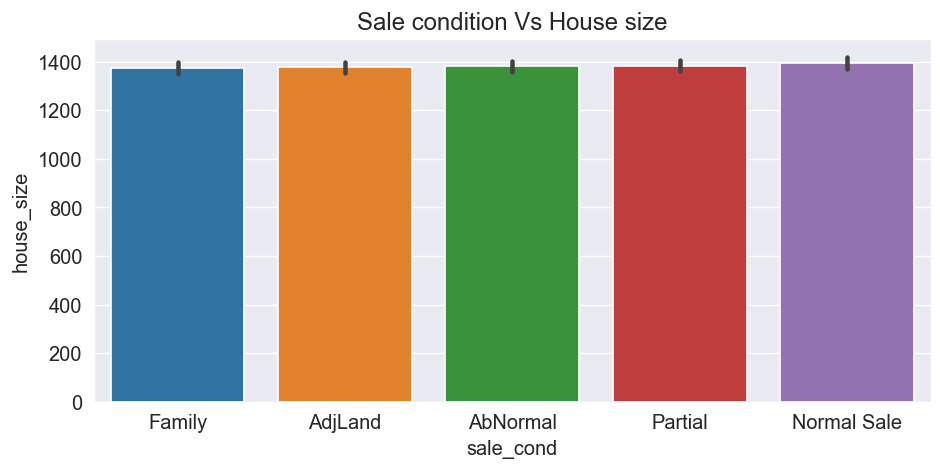

In [106]:
plt.figure(figsize=(9,4))
sns.barplot(x='sale_cond', y='house_size', data=data, order=data[['sale_cond','house_size']].groupby('sale_cond').mean().sort_values('house_size').reset_index().sale_cond)
plt.title("Sale condition Vs House size")
plt.show()

- Sale condition with respect to house size follows a linear trend. Where Normal sale type has higher distribution and family type is lower.

### Parking Facility

In [107]:
data.park_facil.value_counts()

Yes    3587
No     3522
Name: park_facil, dtype: int64

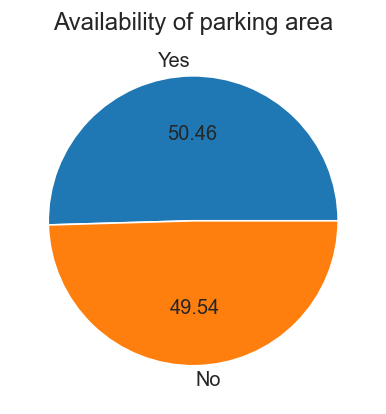

In [108]:
data.park_facil.value_counts().plot(kind='pie', autopct="%.2f", figsize=(9,4))
plt.title("Availability of parking area")
plt.ylabel('')
plt.show()

- Only 0.92% more houses has parking facility.

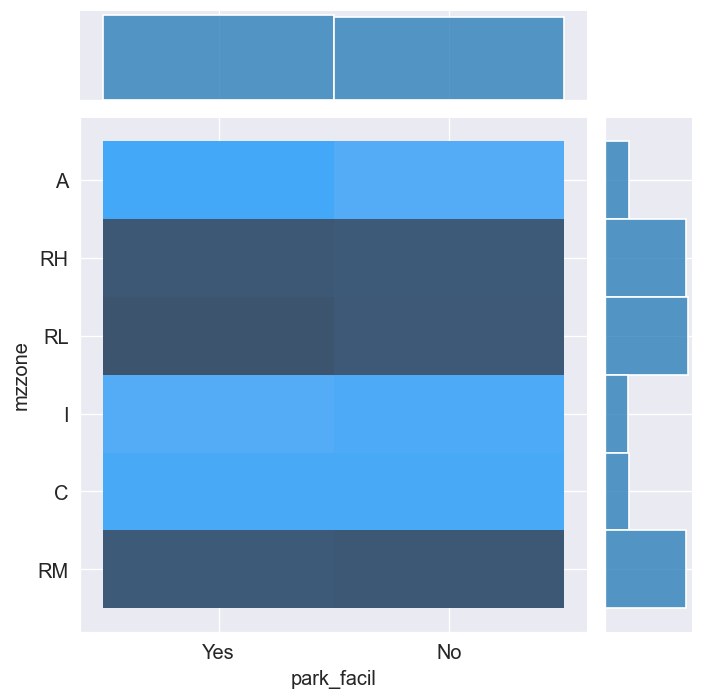

In [109]:
sns.jointplot(x='park_facil',y='mzzone', data=data, kind='hist');

- Municipal zone RL has more houses with parking facility. Whereas A zone has less houses with parking facility.

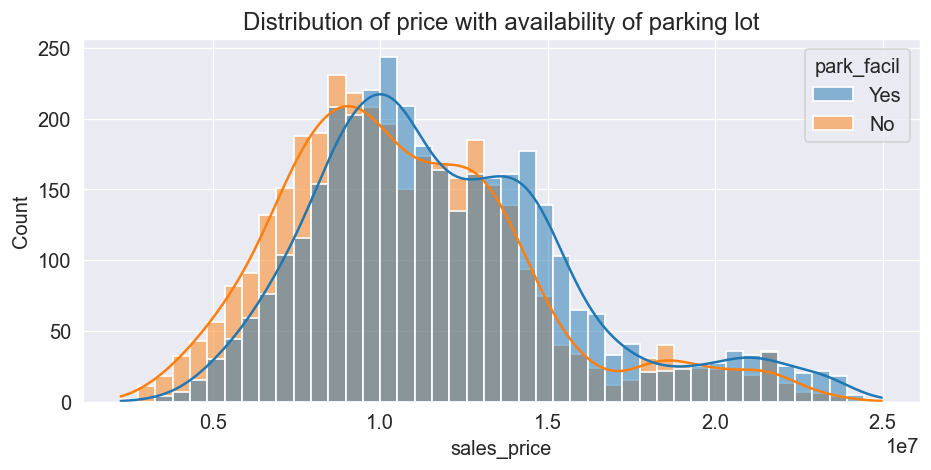

In [110]:
plt.figure(figsize=(9,4))
sns.histplot(data=data, x='sales_price', hue='park_facil',kde=True)
plt.title("Distribution of price with availability of parking lot")
plt.show()

- Overall houses with no parking facility are cheapest while houses with parking area are expensive.

- Some houses has (a few only) has no parking facility but are expensive.

### Built Type

In [111]:
data.buildtype.value_counts()

House         2444
Others        2336
Commercial    2329
Name: buildtype, dtype: int64

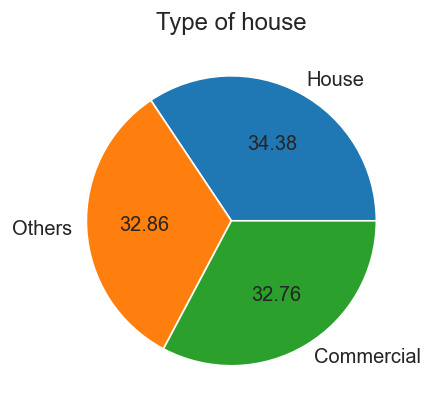

In [112]:
plt.figure(figsize=(9,4))
data.buildtype.value_counts().plot(kind='pie', autopct='%.2f')
plt.title("Type of house")
plt.ylabel('')
plt.show()

- More number of houses are of house type building where as less number of houses are commercial build.

In [113]:
data[['buildtype','sales_price']].groupby('buildtype').mean().sort_values('sales_price')

sales_price
buildtype               
House       9.531205e+06
Others      1.027346e+07
Commercial  1.453023e+07

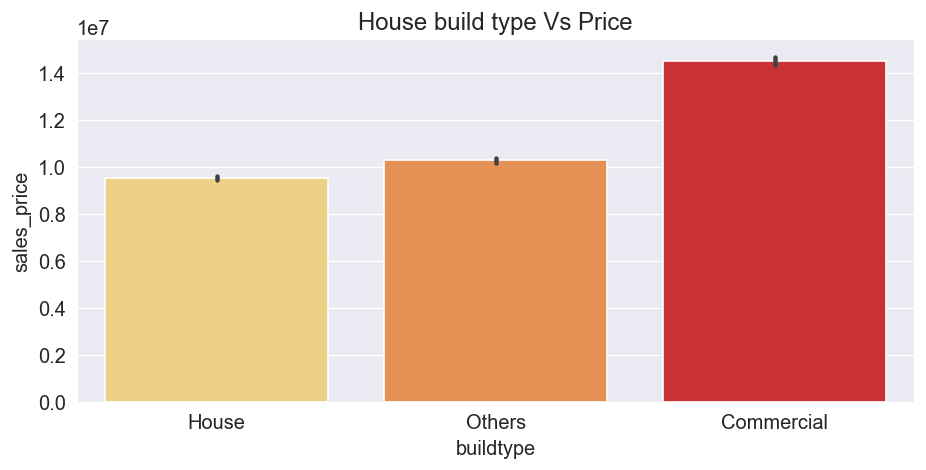

In [114]:
plt.figure(figsize=(9,4))
sns.barplot(x='buildtype', y='sales_price', data=data, order=data[['buildtype','sales_price']].groupby('buildtype').mean().sort_values('sales_price').reset_index().buildtype, palette='YlOrRd')
plt.title("House build type Vs Price")
plt.show()

- Commercial houses are expensive than house type buildings.

- Does not follow linear trend. (one-hot encoding)

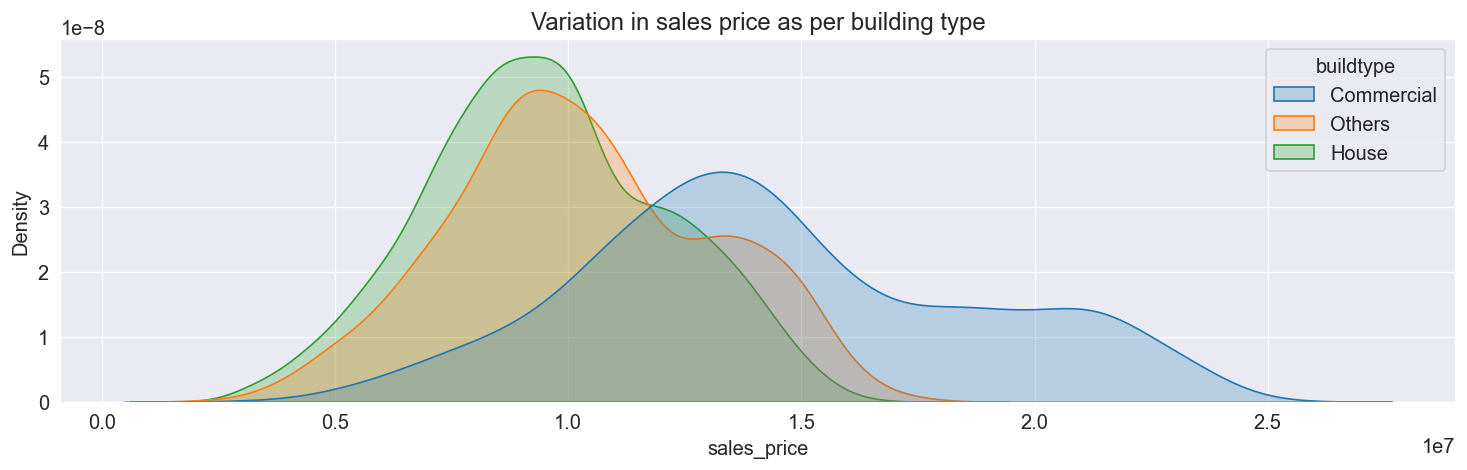

In [115]:
plt.figure(figsize=(15,4))
sns.kdeplot(data=data, x='sales_price', hue='buildtype', shade=True)
plt.title("Variation in sales price as per building type")
plt.show()

- Commercial build type houses are of high price.

### Utility Available 

In [116]:
print("Number of utility {}\nE.g.:".format(data.utility_avail.nunique()))
print(*data.utility_avail.unique().tolist())

Number of utility 4
E.g.:
AllPub ELO NoSewr  NoSeWa


In [117]:
data.utility_avail.value_counts()

AllPub     1887
NoSeWa     1871
NoSewr     1829
ELO        1522
Name: utility_avail, dtype: int64

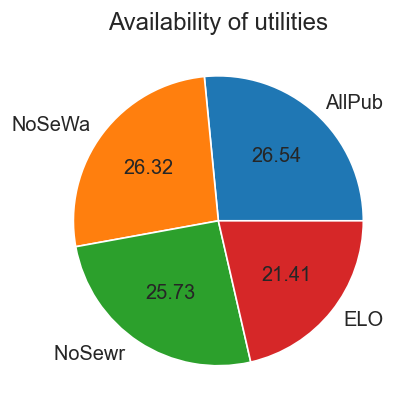

In [118]:
plt.figure(figsize=(9,4))
data.utility_avail.value_counts().plot(kind='pie', autopct="%.2f")
plt.title("Availability of utilities")
plt.ylabel('')
plt.show()

- 26.54% houses has all public facilities available.

In [119]:
order = data[['utility_avail','sales_price']].groupby('utility_avail').mean().sort_values('sales_price')
order

sales_price
utility_avail              
ELO            1.094887e+07
NoSeWa         1.141877e+07
NoSewr         1.144859e+07
AllPub         1.174658e+07

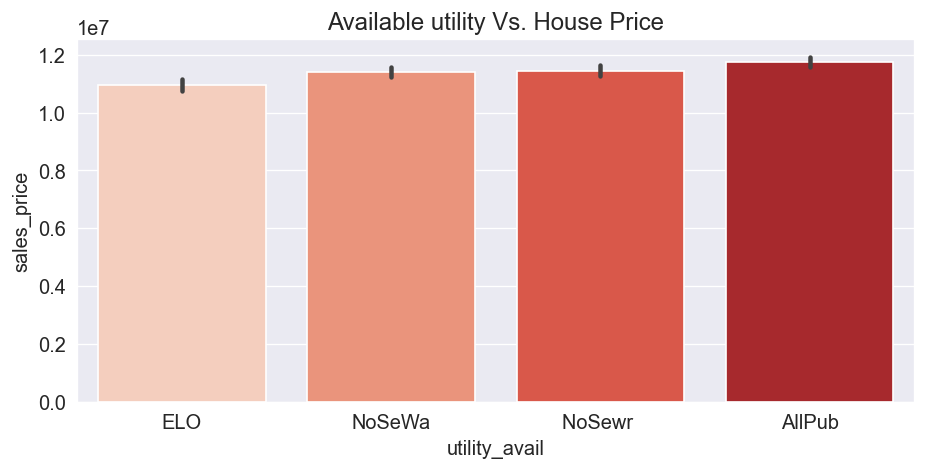

In [120]:
plt.figure(figsize=(9,4))
sns.barplot(x='utility_avail', y='sales_price', data=data, order=order.reset_index().utility_avail, palette='Reds')
plt.title("Available utility Vs. House Price")
plt.show()

- Utility available follows a linear trend with respect to sales price.

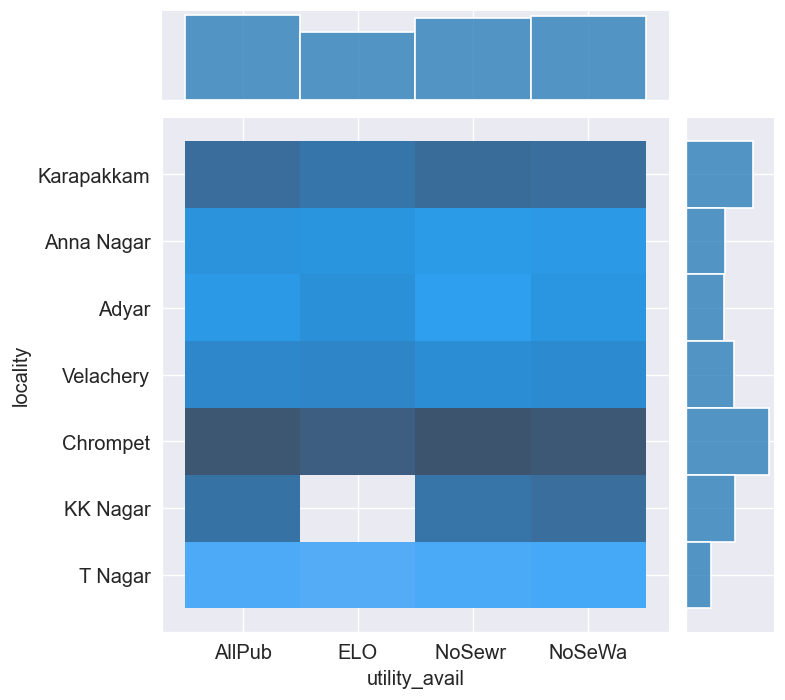

In [121]:
sns.jointplot(data=data, x='utility_avail',y='locality', kind='hist');

- KK Nagar has no ELO facility.
- Chrompet has highest number of houses with all facility available and respectively more houses with no sewage water available.

### Street

In [122]:
data.street.nunique()

3

In [123]:
data.street.value_counts()

Paved        2572
Gravel       2520
No Access    2017
Name: street, dtype: int64

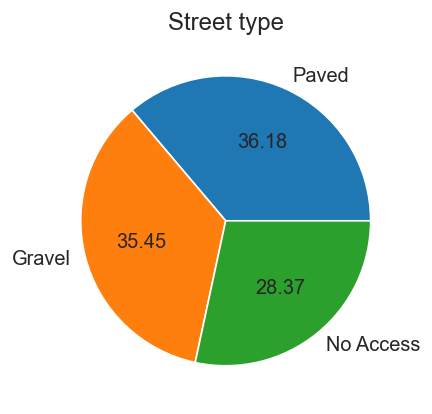

In [124]:
data.street.value_counts().plot(kind='pie', autopct="%.2f", figsize=(9,4))
plt.title("Street type")
plt.ylabel('')
plt.show()

- More than 36% houses has paved street, and 28.37% houses are not connected to any major root.

In [125]:
order = data[['street','sales_price']].groupby('street').mean().sort_values('sales_price')
order

sales_price
street                 
No Access  1.045657e+07
Paved      1.159247e+07
Gravel     1.199494e+07

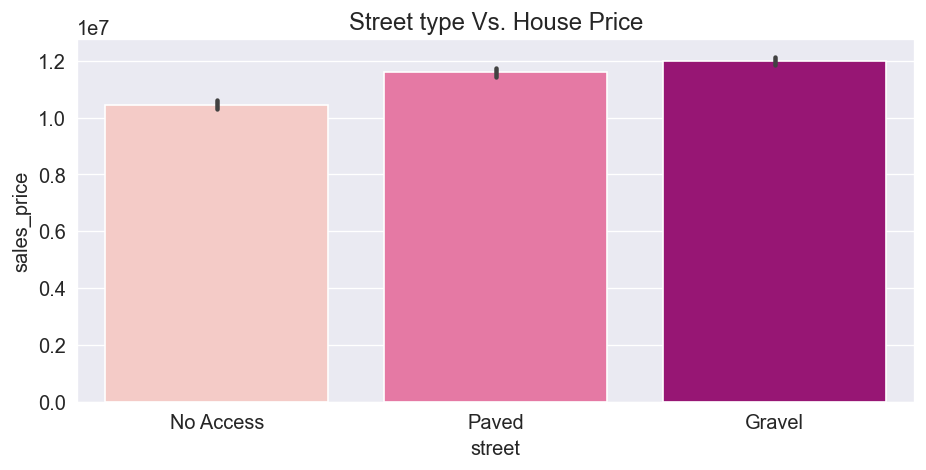

In [126]:
plt.figure(figsize=(9,4))
sns.barplot(x='street', y='sales_price', data=data, order=order.reset_index().street, palette='RdPu')
plt.title("Street type Vs. House Price")
plt.show()

- Street type follows a linear trend with house price.
- Gravel houses have highest price.
- Will go with one hot coding.

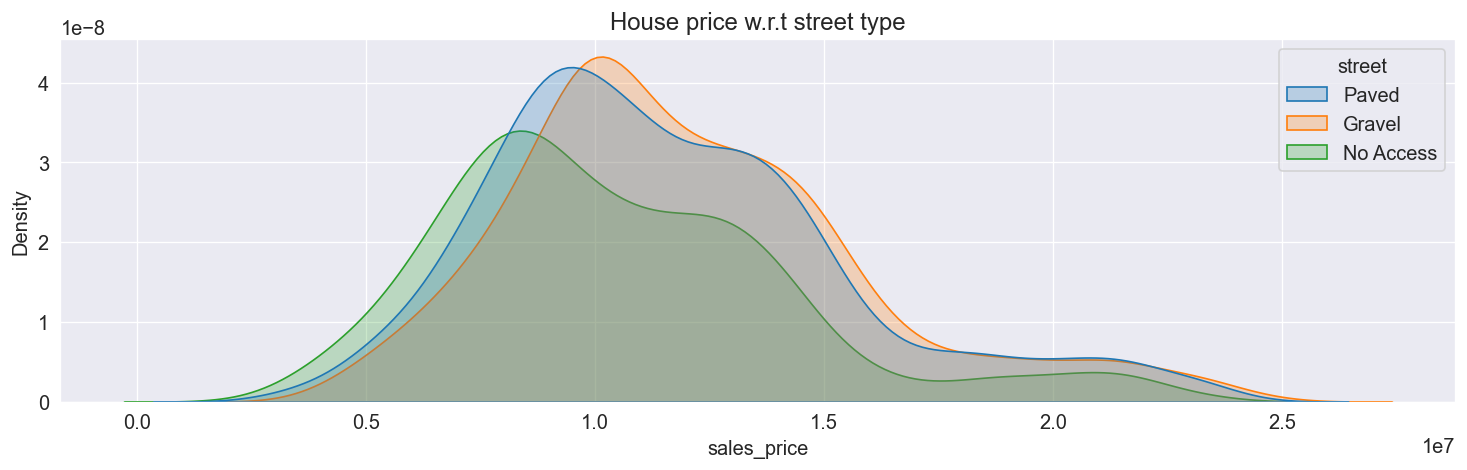

In [128]:
plt.figure(figsize=(15,4))
sns.kdeplot(data=data, x='sales_price', hue='street', shade=True)
plt.title("House price w.r.t street type")
plt.show()

- Houses with no access are less expensive. 

- Most houses with gravel street type are expensive.

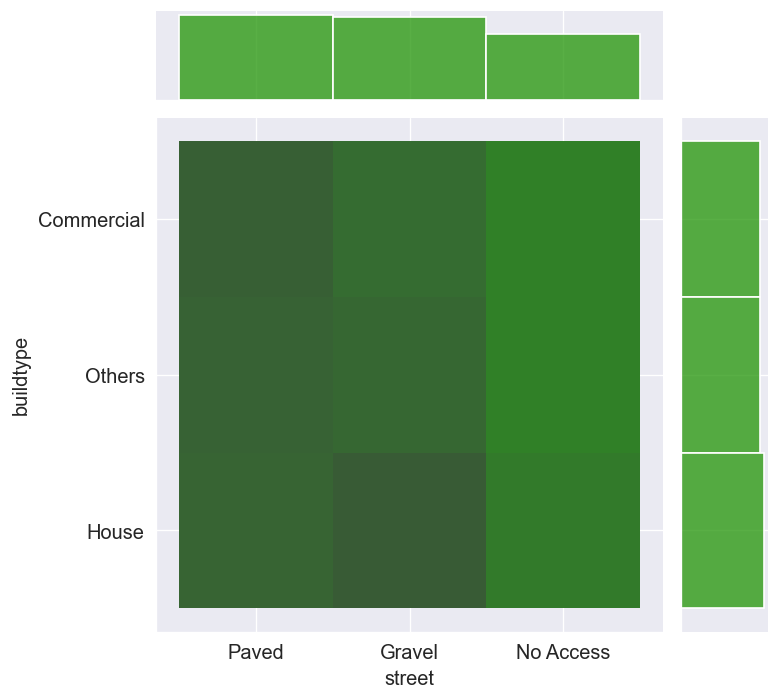

In [ ]:
sns.jointplot(data=data, x='street', y='buildtype', kind='hist', color='#229506');

- Most commercial houses are of paved street, and most house type houses has gravel street.
- Among houses with no access, number of housing type houses are more.

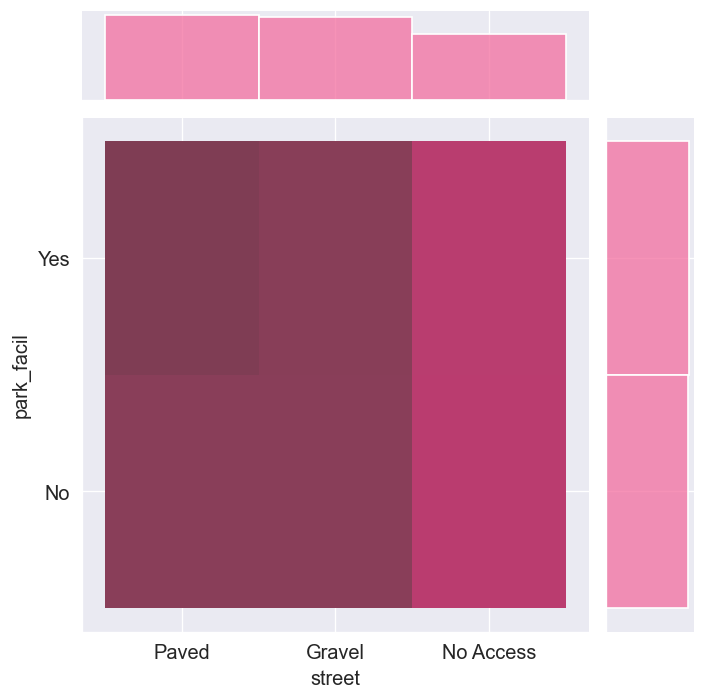

In [ ]:
sns.jointplot(data=data, x='street', y='park_facil', kind='hist', color='#F36E9F');

- Paved street type houses has comparatively a few number of houses with parking facility.

### Municipality zone

In [ ]:
data.mzzone.nunique()

6

In [ ]:
data.mzzone.value_counts()

RL    1858
RH    1822
RM    1817
C      550
A      537
I      525
Name: mzzone, dtype: int64

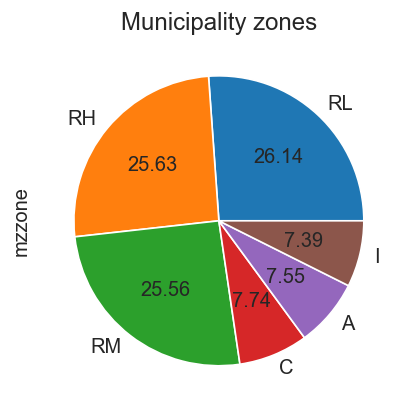

In [ ]:
data.mzzone.value_counts().plot(kind='pie', autopct="%.2f", figsize=(9,4))
plt.title("Municipality zones")
plt.ylabel('')
plt.show()

- There are houses from 6 municipality zone are present in the dataset.
- Most number of houses are from RL, RH and RM zone.


In [ ]:
order = data[['mzzone', 'sales_price']].groupby('mzzone').mean().sort_values('sales_price')
order

sales_price
mzzone              
A       7.660002e+06
C       8.457634e+06
I       9.170939e+06
RH      1.156145e+07
RL      1.231839e+07
RM      1.298932e+07

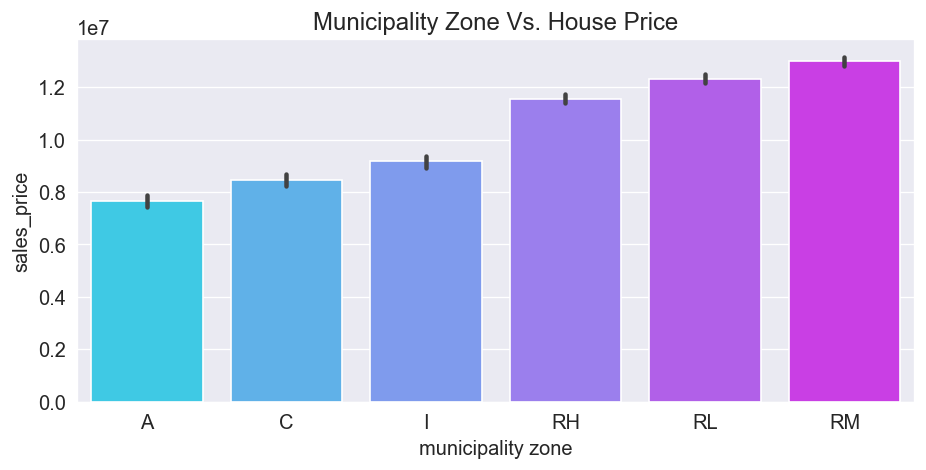

In [ ]:
plt.figure(figsize=(9,4))
sns.barplot(x='mzzone', y='sales_price', data=data, order=order.reset_index().mzzone, palette='cool')
plt.title("Municipality Zone Vs. House Price")
plt.xlabel('municipality zone')
plt.show()

- House price increases with the municipality zone.

- RM zone has most expensive houses, whereas A zone has cheapest houses.

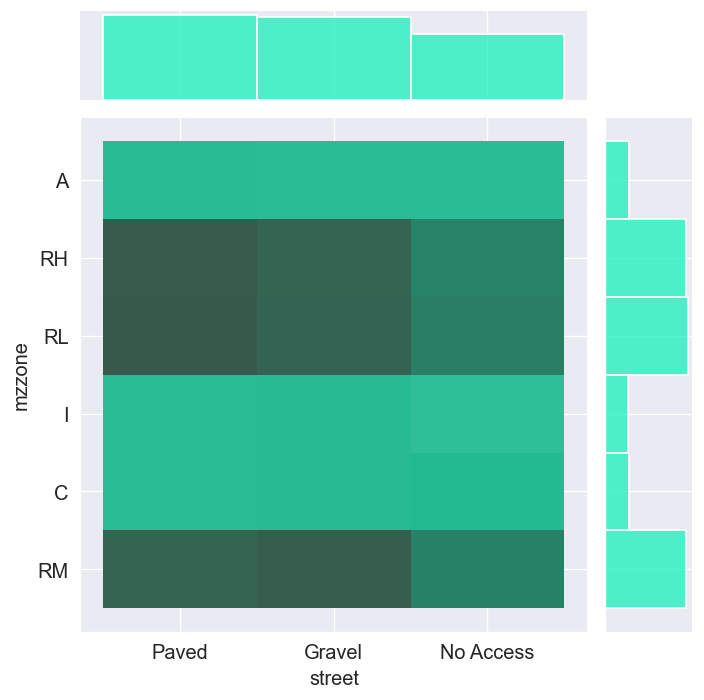

In [ ]:
sns.jointplot(data=data, x='street',y='mzzone', kind='hist', color='#18F1BB');

### Age of House 

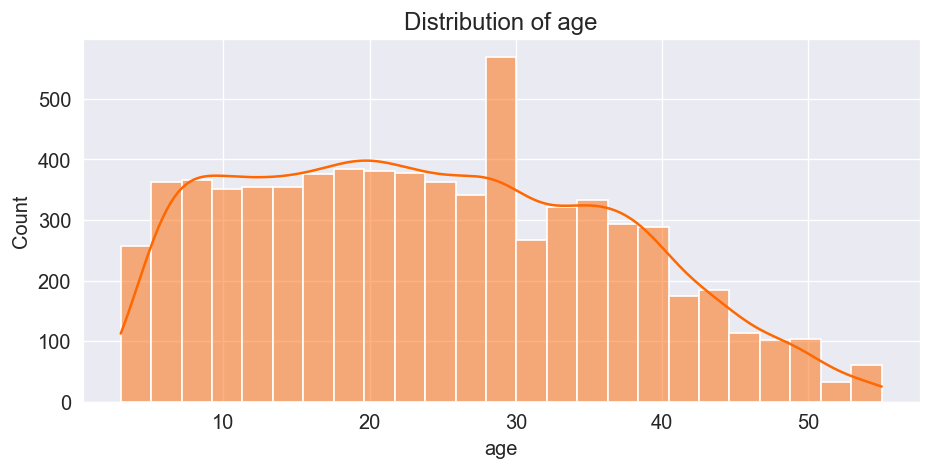

In [129]:

sns.histplot(data=data, x='age', kde=True, color='#ff6700')
plt.title("Distribution of age")
plt.show()

- Distribution in house age is skewed.

- Theres are less aged houses, i.e. less number of houses age more than 35

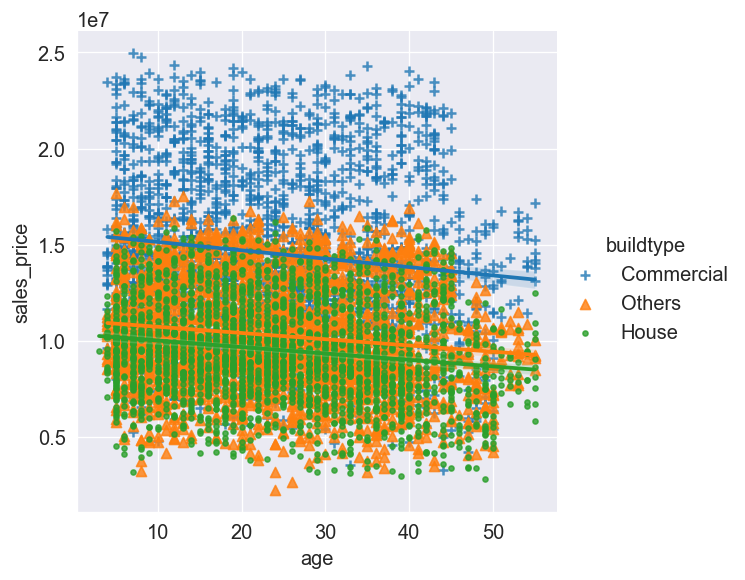

In [ ]:
ax = sns.lmplot(data=data, x='age', y='sales_price', hue='buildtype', markers=['+', '^', '.']) #color="#c04000")

- With increase in house age price decreases.

- The trend is linear.

### QS Rooms

In [ ]:
data.head()

locality  house_size  dist_mainroad  n_bedroom  n_bathroom  n_room  \
0  Karapakkam        1004            131          1           1       3   
1  Anna Nagar        1986             26          2           1       5   
2       Adyar         909             70          1           1       3   
3   Velachery        1855             14          3           2       5   
4  Karapakkam        1226             84          1           1       3   

  sale_cond park_facil   buildtype utility_avail  street mzzone  qs_rooms  \
0  AbNormal        Yes  Commercial        AllPub   Paved      A       4.0   
1  AbNormal         No  Commercial        AllPub  Gravel     RH       4.9   
2  AbNormal        Yes  Commercial           ELO  Gravel     RL       4.1   
3    Family         No      Others       NoSewr    Paved      I       4.7   
4  AbNormal        Yes      Others        AllPub  Gravel      C       3.0   

   qs_bathroom  qs_bedroom  qs_overall  sales_price  age  
0          3.9         4.9       4.330      8124400   44  
1          4.2         2.5       3.765     22781941   11  
2          3.8         2.2       3.090     13672408   20  
3          3.9         3.6       4.010     10063653   22  
4          2.5         4.1       3.290      7717313   30

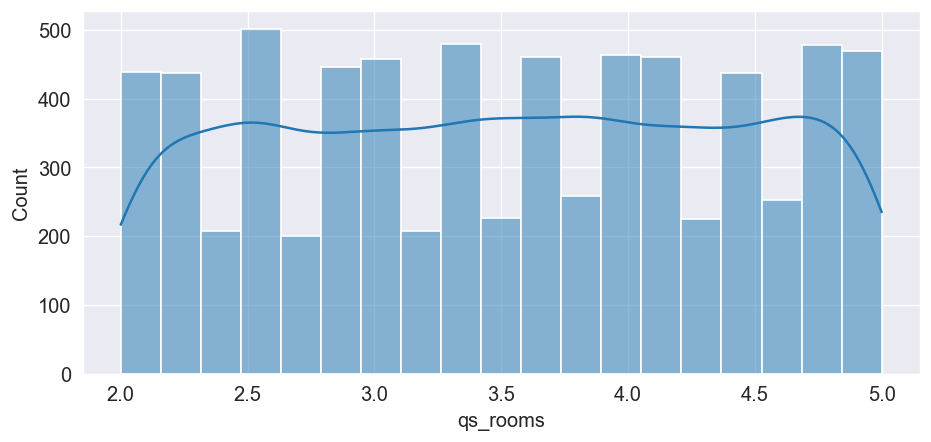

In [ ]:
sns.histplot(data=data, x='qs_rooms', kde=True);

- Distribution in QS rooms is uniform.

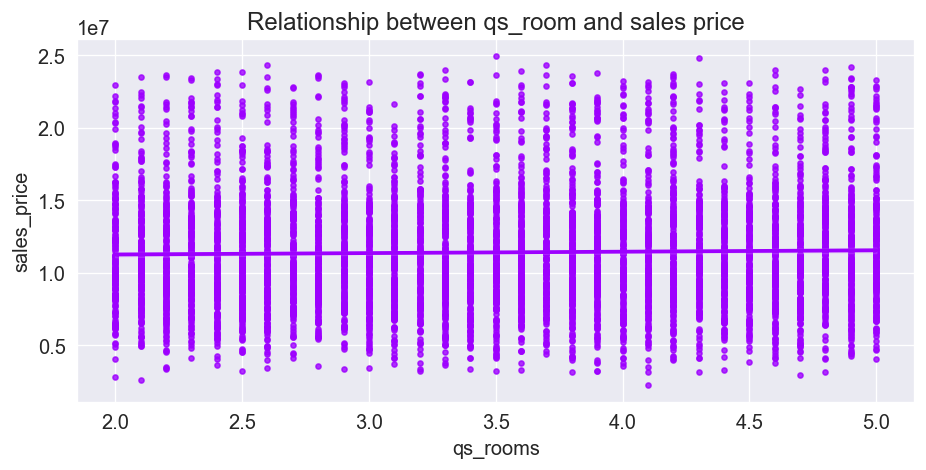

In [ ]:
plt.figure(figsize=(9,4))
sns.regplot(data=data, x='qs_rooms', y='sales_price', color='#9d00ff', marker='.')
plt.title("Relationship between qs_room and sales price")
plt.show()

- QS room follows uniform discrete distribution with sales price.

### QS Overall

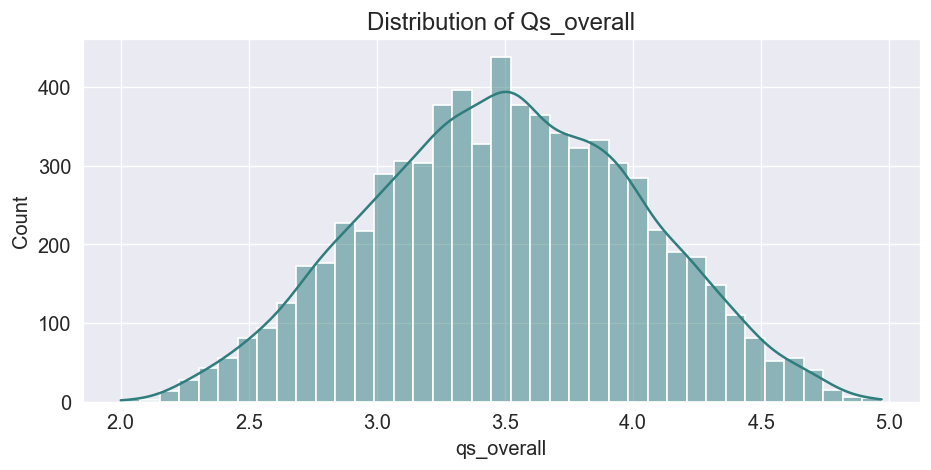

In [ ]:
plt.figure(figsize=(9,4))
sns.histplot(data=data, x='qs_overall', color='#307d7e', kde=True)
plt.title("Distribution of Qs_overall")
plt.show()

- QS overall follows a linear distribution

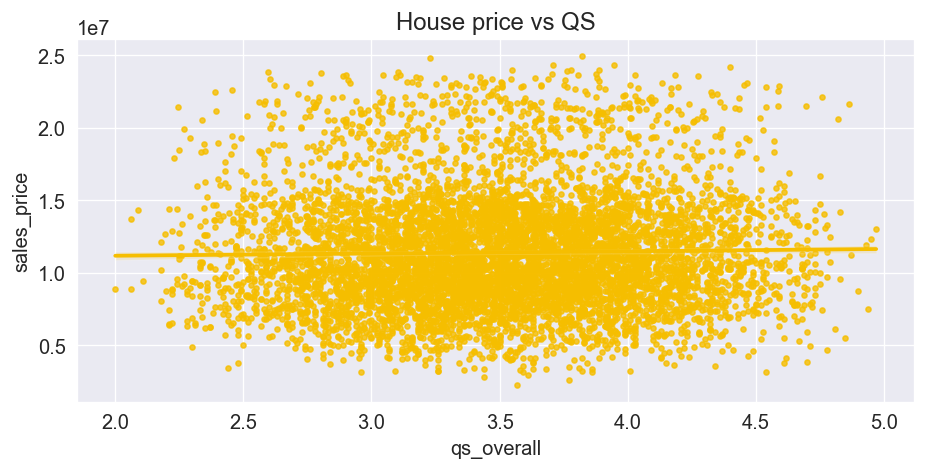

In [ ]:
plt.figure(figsize=(9,4))
sns.regplot(data=data, x='qs_overall', y='sales_price', marker='.', color='#f6be00')
plt.title("House price vs QS")
plt.show()

- QS Overall also follows an uniform distribution with sales price.

## Data Pre-Processing

Type 1: Label Encoding:

In [ ]:
df = data.copy()

df.head()

locality  house_size  dist_mainroad  n_bedroom  n_bathroom  n_room  \
0  Karapakkam        1004            131          1           1       3   
1  Anna Nagar        1986             26          2           1       5   
2       Adyar         909             70          1           1       3   
3   Velachery        1855             14          3           2       5   
4  Karapakkam        1226             84          1           1       3   

  sale_cond park_facil   buildtype utility_avail  street mzzone  qs_rooms  \
0  AbNormal        Yes  Commercial        AllPub   Paved      A       4.0   
1  AbNormal         No  Commercial        AllPub  Gravel     RH       4.9   
2  AbNormal        Yes  Commercial           ELO  Gravel     RL       4.1   
3    Family         No      Others       NoSewr    Paved      I       4.7   
4  AbNormal        Yes      Others        AllPub  Gravel      C       3.0   

   qs_bathroom  qs_bedroom  qs_overall  sales_price  age  
0          3.9         4.9       4.330      8124400   44  
1          4.2         2.5       3.765     22781941   11  
2          3.8         2.2       3.090     13672408   20  
3          3.9         3.6       4.010     10063653   22  
4          2.5         4.1       3.290      7717313   30

In [ ]:
def mapper_func(col):
    mapper = {}
    for i in col:
        print(i)
        val = int(input())
        mapper[i] = val
    
    return mapper

In [ ]:
locality_mapper = mapper_func(col=df.locality.unique().tolist())

Karapakkam
Anna Nagar
Adyar
Velachery
Chrompet
KK Nagar
T Nagar


In [ ]:
print(locality_mapper)

{'Karapakkam': 1, 'Anna Nagar': 6, 'Adyar': 2, 'Velachery': 4, 'Chrompet': 3, 'KK Nagar': 5, 'T Nagar': 7}


In [ ]:
sale_condition_mapper = mapper_func(df.sale_cond.unique().tolist())

print(sale_condition_mapper)

AbNormal
Family
Partial
AdjLand
Normal Sale
{'AbNormal': 3, 'Family': 2, 'Partial': 1, 'AdjLand': 5, 'Normal Sale': 4}


In [ ]:
utility_mapper = mapper_func(df.utility_avail.unique().tolist())

print(utility_mapper)

AllPub
ELO
NoSewr 
NoSeWa
{'AllPub': 4, 'ELO': 1, 'NoSewr ': 3, 'NoSeWa': 2}


In [ ]:
df.mzzone.unique().tolist()

['A', 'RH', 'RL', 'I', 'C', 'RM']

In [ ]:
mzone_mapper = mapper_func(df.mzzone.unique().tolist())

print(mzone_mapper)

A
RH
RL
I
C
RM
{'A': 1, 'RH': 4, 'RL': 5, 'I': 3, 'C': 2, 'RM': 6}


In [ ]:
street_mapper = mapper_func(df.street.unique().tolist())
print(street_mapper)

Paved
Gravel
No Access
{'Paved': 2, 'Gravel': 3, 'No Access': 1}


#### Label Encoding

In [ ]:
df['locality'] = df.locality.map(locality_mapper)           # map locality
df['sale_cond'] = df.sale_cond.map(sale_condition_mapper)   # map sale condition
df['park_facil'] = df.park_facil.map({'Yes':1,"No":0})      # parking facility
# df['buildtype'] = df.buildtype.map(build_type_mapper)       # build type
df['utility_avail'] = df.utility_avail.map(utility_mapper)  # utility
df['street'] = df.street.map(street_mapper)                 # street
df['mzzone'] = df.mzzone.map(mzone_mapper)                  # municipality zone

In [ ]:
df.head()

locality  house_size  dist_mainroad  n_bedroom  n_bathroom  n_room  \
0         1        1004            131          1           1       3   
1         6        1986             26          2           1       5   
2         2         909             70          1           1       3   
3         4        1855             14          3           2       5   
4         1        1226             84          1           1       3   

   sale_cond  park_facil   buildtype  utility_avail  street  mzzone  qs_rooms  \
0          3           1  Commercial              4       2       1       4.0   
1          3           0  Commercial              4       3       4       4.9   
2          3           1  Commercial              1       3       5       4.1   
3          2           0      Others              3       2       3       4.7   
4          3           1      Others              4       3       2       3.0   

   qs_bathroom  qs_bedroom  qs_overall  sales_price  age  
0          3.9         4.9       4.330      8124400   44  
1          4.2         2.5       3.765     22781941   11  
2          3.8         2.2       3.090     13672408   20  
3          3.9         3.6       4.010     10063653   22  
4          2.5         4.1       3.290      7717313   30

In [ ]:
# Encoding build type

df = pd.get_dummies(df)

In [ ]:
df.head()

locality  house_size  dist_mainroad  n_bedroom  n_bathroom  n_room  \
0         1        1004            131          1           1       3   
1         6        1986             26          2           1       5   
2         2         909             70          1           1       3   
3         4        1855             14          3           2       5   
4         1        1226             84          1           1       3   

   sale_cond  park_facil  utility_avail  street  mzzone  qs_rooms  \
0          3           1              4       2       1       4.0   
1          3           0              4       3       4       4.9   
2          3           1              1       3       5       4.1   
3          2           0              3       2       3       4.7   
4          3           1              4       3       2       3.0   

   qs_bathroom  qs_bedroom  qs_overall  sales_price  age  \
0          3.9         4.9       4.330      8124400   44   
1          4.2         2.5       3.765     22781941   11   
2          3.8         2.2       3.090     13672408   20   
3          3.9         3.6       4.010     10063653   22   
4          2.5         4.1       3.290      7717313   30   

   buildtype_Commercial  buildtype_House  buildtype_Others  
0                     1                0                 0  
1                     1                0                 0  
2                     1                0                 0  
3                     0                0                 1  
4                     0                0                 1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7109 entries, 0 to 7108
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   locality              7109 non-null   int64  
 1   house_size            7109 non-null   int64  
 2   dist_mainroad         7109 non-null   int64  
 3   n_bedroom             7109 non-null   int64  
 4   n_bathroom            7109 non-null   int64  
 5   n_room                7109 non-null   int64  
 6   sale_cond             7109 non-null   int64  
 7   park_facil            7109 non-null   int64  
 8   utility_avail         7109 non-null   int64  
 9   street                7109 non-null   int64  
 10  mzzone                7109 non-null   int64  
 11  qs_rooms              7109 non-null   float64
 12  qs_bathroom           7109 non-null   float64
 13  qs_bedroom            7109 non-null   float64
 14  qs_overall            7109 non-null   float64
 15  sales_price          

In [ ]:
# drop columns with no relation to house price
# dist_mainroad, qs_rooms, qs_bedroom, qs_overall

df.drop(['dist_mainroad', 'qs_rooms', 'qs_bathroom','qs_overall', 'qs_bedroom'], axis=1, inplace=True)

In [ ]:
df.to_csv('chennai-housing-label-encoded.csv', index=False)

#### Split the dataset

In [130]:
df = pd.read_csv('chennai-housing-label-encoded.csv')
df.head()

locality  house_size  n_bedroom  n_bathroom  n_room  sale_cond  park_facil  \
0         1        1004          1           1       3          3           1   
1         6        1986          2           1       5          3           0   
2         2         909          1           1       3          3           1   
3         4        1855          3           2       5          2           0   
4         1        1226          1           1       3          3           1   

   utility_avail  street  mzzone  sales_price  age  buildtype_Commercial  \
0              4       2       1      8124400   44                     1   
1              4       3       4     22781941   11                     1   
2              1       3       5     13672408   20                     1   
3              3       2       3     10063653   22                     0   
4              4       3       2      7717313   30                     0   

   buildtype_House  buildtype_Others  
0                0                 0  
1                0                 0  
2                0                 0  
3                0                 1  
4                0                 1

#### Transform of non-linear data

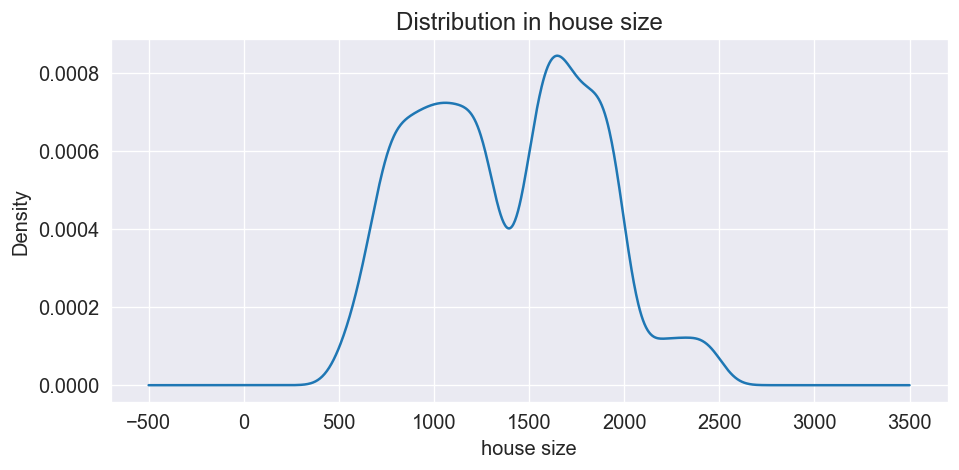

In [131]:
df.house_size.plot.kde()
plt.title("Distribution in house size")
plt.xlabel('house size')
plt.show()

- Non-normal distribution.

In [132]:
# Transformation
df['house_size'] = np.log(df.house_size)

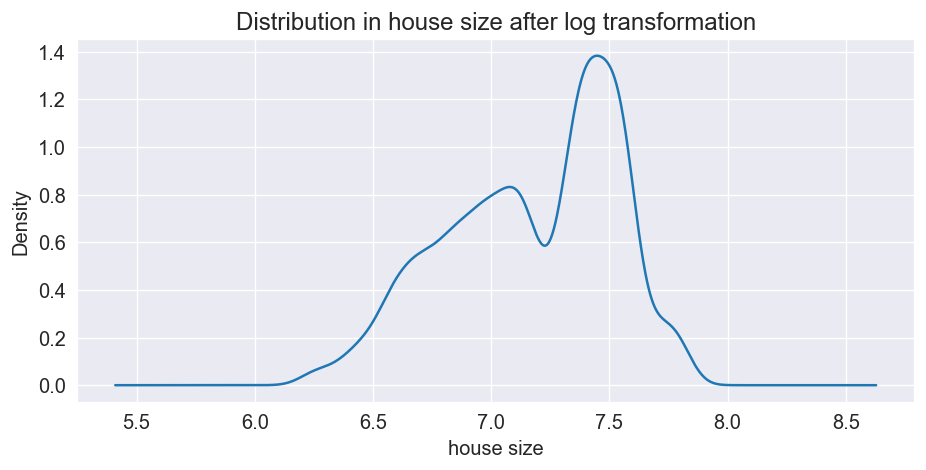

In [133]:
df.house_size.plot(kind='kde')
plt.title("Distribution in house size after log transformation")
plt.xlabel('house size')
plt.show()

#### Train test split

In [134]:
X = df.drop(['sales_price'], axis=1)
y = df.sales_price

X.shape, y.shape

((7109, 14), (7109,))

In [135]:
X_train, X_test, y_train, y_test = train_test_split(X,y, shuffle=True, random_state=47, test_size=0.2)

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5687, 14), (5687,), (1422, 14), (1422,))

#### Scale

In [136]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Fit Linear Regression Model

In [137]:
lr = LinearRegression().fit(X_train, y_train)

# predict
y_pred = lr.predict(X_test)

In [138]:
# score
print("Training score: {:.2f}".format(lr.score(X_train, y_train)))
print("Test score: {:.2f}".format(lr.score(X_test, y_test)))


print("")
print("R2 score: {:.2f}".format(metrics.r2_score(y_test, y_pred)))
print("MSE: {:.2f}".format(metrics.mean_squared_error(y_test, y_pred)))
print("MAE: {:.2f}".format(metrics.mean_absolute_error(y_test, y_pred)))



Training score: 0.92
Test score: 0.92

R2 score: 0.92
MSE: 1192368420042.32
MAE: 823341.26


#### prediction


In [139]:
lr_prediction = pd.DataFrame({
    'actual':y_test,
    'predicted':y_pred.flatten()
})

lr_prediction.head(10)

actual     predicted
3410   9305778  9.579305e+06
5610  11420800  1.089822e+07
72     9466999  9.954089e+06
4268  13685704  1.475255e+07
2399  21694013  1.910660e+07
661   12937737  1.333329e+07
3798   8652769  7.807785e+06
708    6550648  5.483305e+06
3464  21137174  1.933188e+07
2126  11998838  1.311006e+07

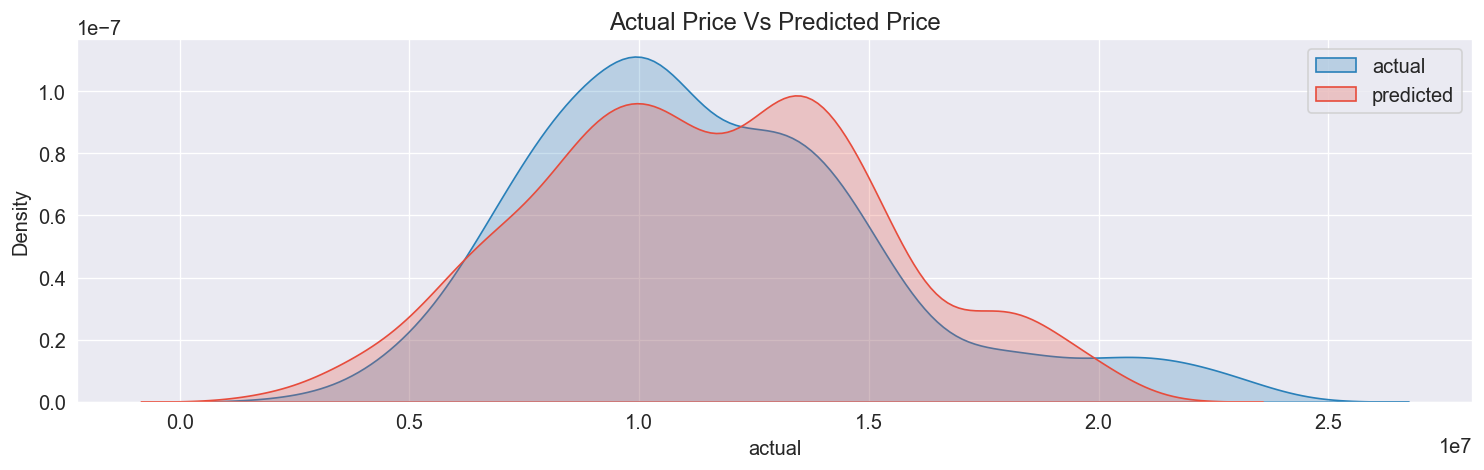

In [140]:
plt.figure(figsize=(15,4))
sns.kdeplot(data=lr_prediction, x='actual', label='actual', color='#2980b9', shade=True)
sns.kdeplot(data=lr_prediction, x='predicted', label='predicted', color='#e74c3c', shade=True)
plt.title("Actual Price Vs Predicted Price")
plt.legend()
plt.show()

- Model has 92% r2 score, the train and test score are also same. 
- However, most of predictions are not good.

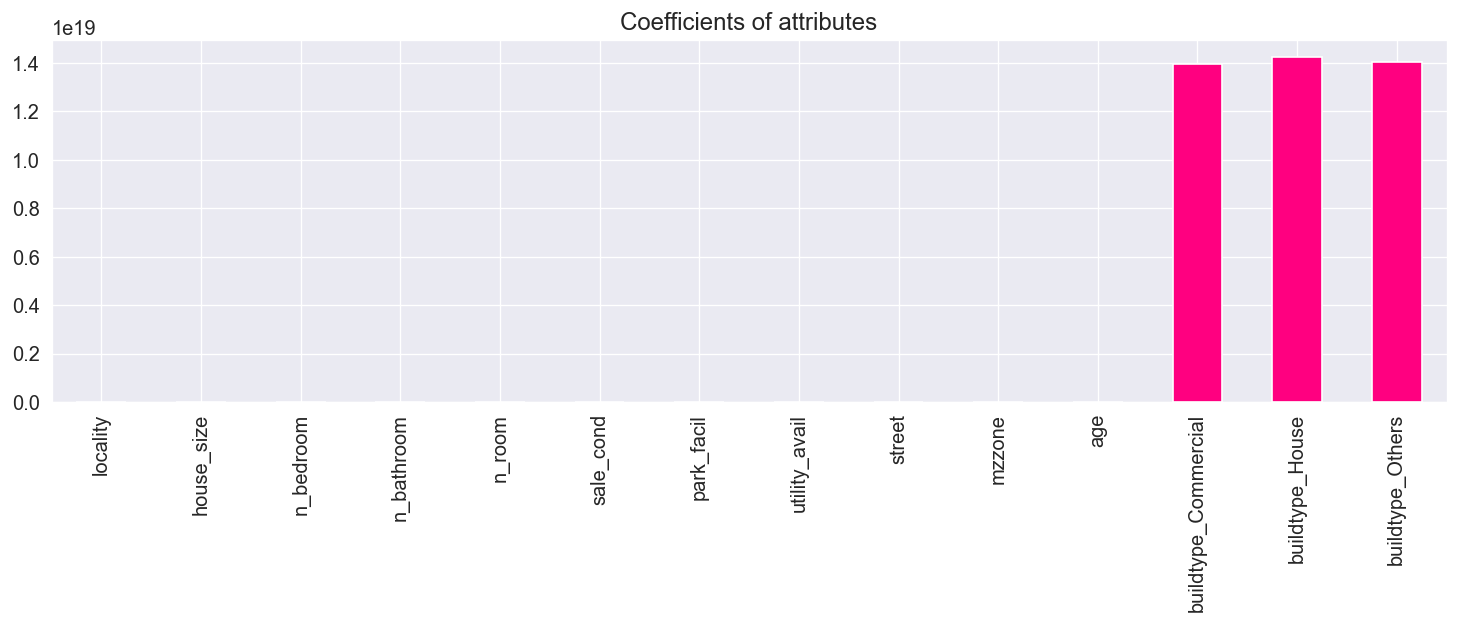

In [ ]:
# coefficients
lr_coefficient = pd.Series(lr.coef_, index=X.columns.tolist())

plt.figure(figsize=(15, 4))
lr_coefficient.plot(kind='bar', color=['#ff0080'])
plt.title("Coefficients of attributes")
plt.show()

- Features like distance form main road, number of bedrooms, utility available, qs room, qs bedroom, qs overall and age has less coefficient.

- Build type, number of bedroom, number of room, locality, and municipality zone are having higher coefficient.

#### ElasticNet Regression

In [141]:
elnet= ElasticNet(alpha=0.001, l1_ratio=0.62)

elnet.fit(X_train, y_train)
elasticnet_predict = elnet.predict(X_test)

In [142]:
# score
print("ElasticNet Training score: {:.2f}".format(elnet.score(X_train, y_train)))
print("ElasticNet Test score: {:.2f}".format(elnet.score(X_test, y_test)))


print("")
print("ElasticNet R2 score: {:.2f}".format(metrics.r2_score(y_test, elasticnet_predict)))
print("ElasticNet MSE: {:.2f}".format(metrics.mean_squared_error(y_test, elasticnet_predict)))
print("ElasticNet MAE: {:.2f}".format(metrics.mean_absolute_error(y_test, elasticnet_predict)))

ElasticNet Training score: 0.92
ElasticNet Test score: 0.92

ElasticNet R2 score: 0.92
ElasticNet MSE: 1192503440184.48
ElasticNet MAE: 823328.41


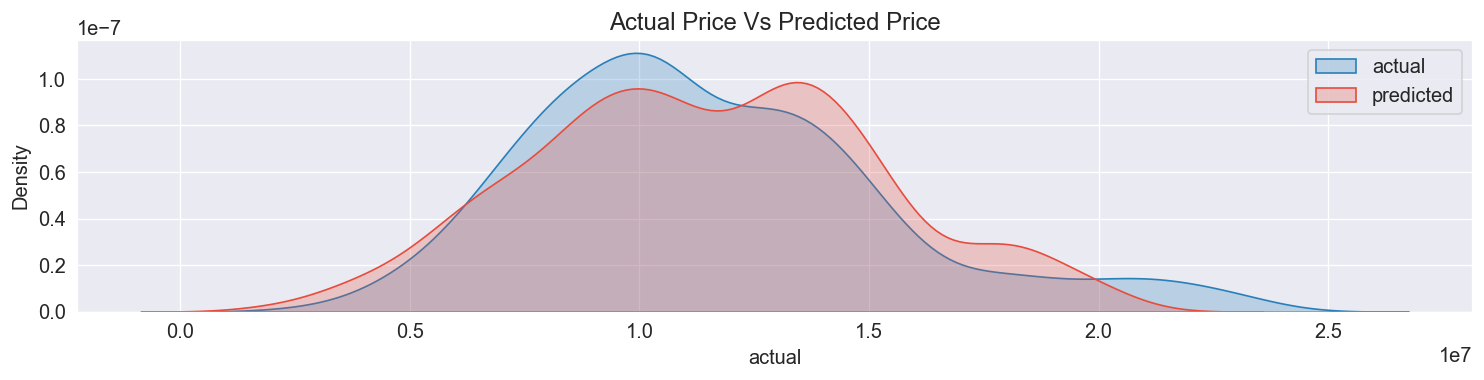

In [143]:
elnet_prediction = pd.DataFrame({
    'actual':y_test,
    'predicted':elasticnet_predict.flatten()
})


plt.figure(figsize=(15,3))
sns.kdeplot(data=elnet_prediction, x='actual', label='actual', color='#2980b9', shade=True)
sns.kdeplot(data=elnet_prediction, x='predicted', label='predicted', color='#e74c3c', shade=True)
plt.title("Actual Price Vs Predicted Price")
plt.legend()
plt.show()

- Both the elastic net and linear regression predictions are identical.

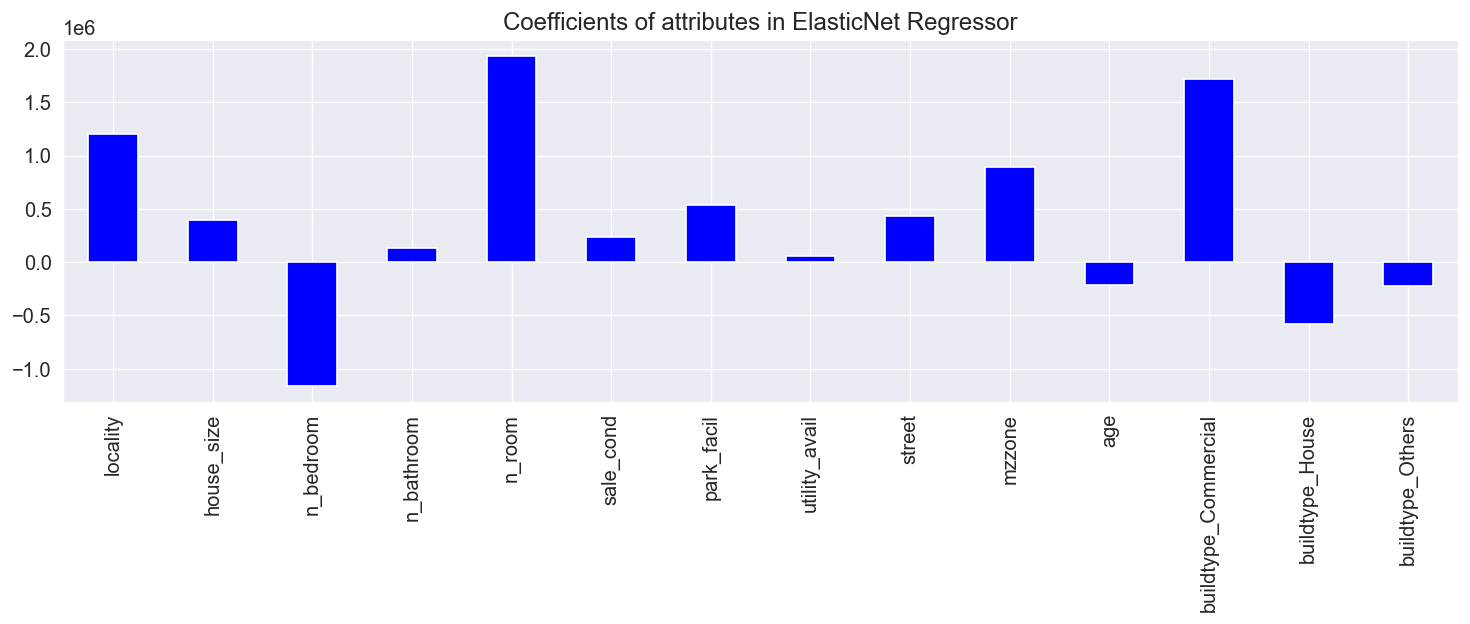

In [144]:
# coefficients
elnet_coefficient = pd.Series(elnet.coef_, index=X.columns.tolist())

plt.figure(figsize=(15, 4))
elnet_coefficient.plot(kind='bar', color=['b'])
plt.title("Coefficients of attributes in ElasticNet Regressor")
plt.show()

- The coefficients of elastic net regressor model are also same to the coefficients of elastic net regressor.

### Decision Tree Regression:



In [145]:
dt_regressor = DecisionTreeRegressor(max_depth=8).fit(X_train, y_train)

dt_y_predict = dt_regressor.predict(X_test)

In [146]:
# score
print("DT Training score: {:.2f}".format(dt_regressor.score(X_train, y_train)))
print("DT Test score: {:.2f}".format(dt_regressor.score(X_test, y_test)))


print("")
print("DT R2 score: {:.2f}".format(metrics.r2_score(y_test, dt_y_predict)))
print("DT MSE: {:.2f}".format(metrics.mean_squared_error(y_test, dt_y_predict)))
print("DT MAE: {:.2f}".format(metrics.mean_absolute_error(y_test, dt_y_predict)))

DT Training score: 0.97
DT Test score: 0.96

DT R2 score: 0.96
DT MSE: 659810240269.60
DT MAE: 640807.20


- The R^2 score looks good.
- The train test scores are near to each other.

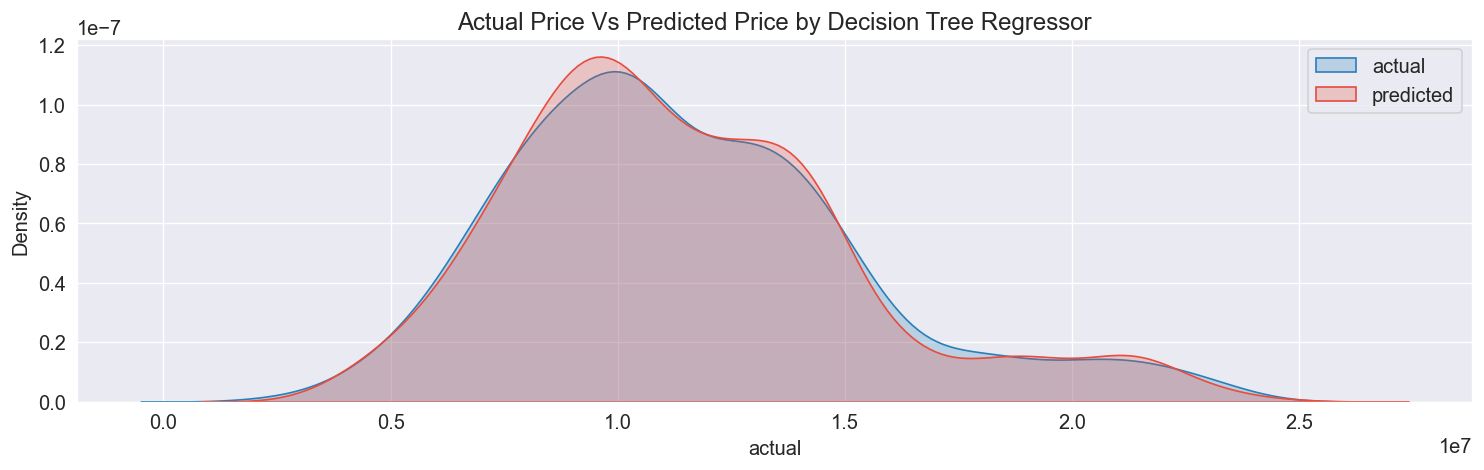

In [147]:
dt_prediction = pd.DataFrame({
    'actual':y_test,
    'predicted': dt_y_predict.flatten()
})


plt.figure(figsize=(15,4))
sns.kdeplot(data=dt_prediction, x='actual', label='actual', color='#2980b9', shade=True)
sns.kdeplot(data=dt_prediction, x='predicted', label='predicted', color='#e74c3c', shade=True)
plt.title("Actual Price Vs Predicted Price by Decision Tree Regressor")
plt.legend()
plt.show()

- The predictions of DT looks nearly accurate and the model has better score

In [148]:
# coefficients
dt_coefficient = pd.Series(dt_regressor.feature_importances_, index=X.columns.tolist())


In [149]:
dt_coefficient.sort_values(ascending=False)

locality                0.495919
buildtype_Commercial    0.331385
house_size              0.098908
mzzone                  0.036050
park_facil              0.014238
n_bedroom               0.011062
street                  0.007358
buildtype_House         0.002639
age                     0.001137
buildtype_Others        0.000934
sale_cond               0.000156
utility_avail           0.000139
n_room                  0.000076
n_bathroom              0.000000
dtype: float64

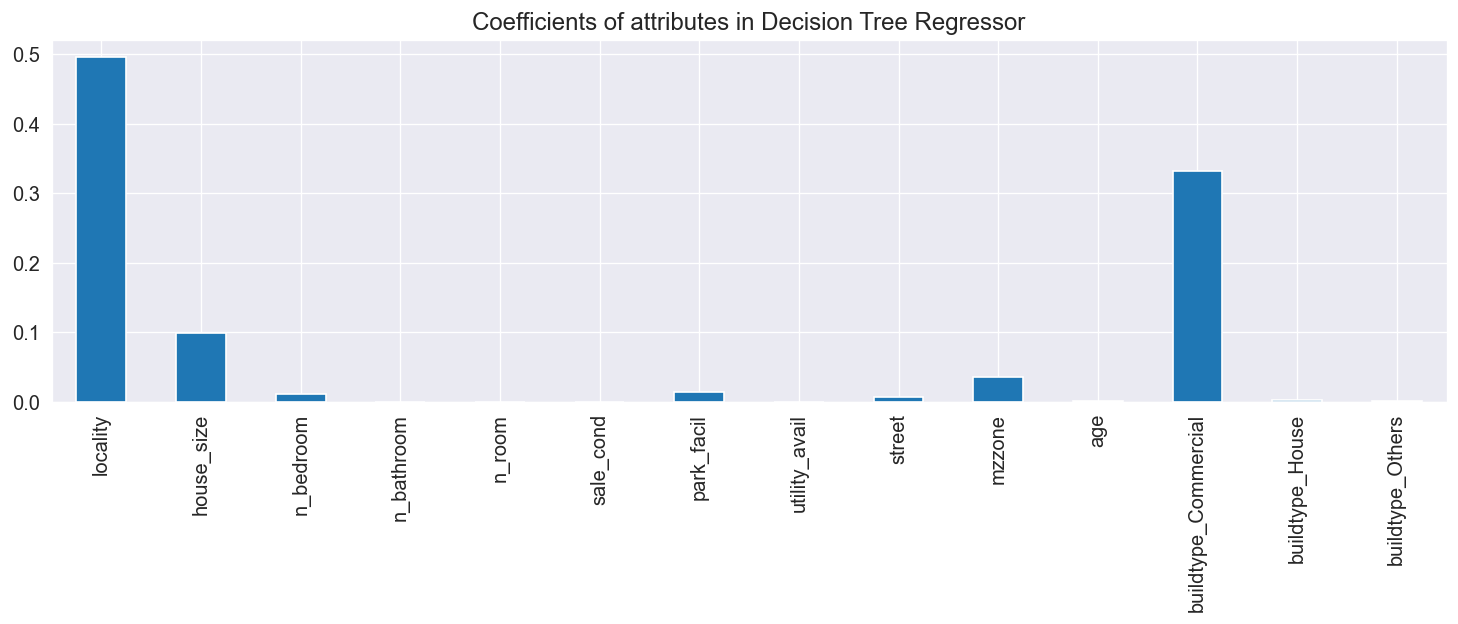

In [152]:
# coefficients

plt.figure(figsize=(15, 4))
dt_coefficient.plot(kind='bar')
plt.title("Coefficients of attributes in Decision Tree Regressor")
plt.show()

- In the decision tree regressor model, locality, building type has more feature importance, followed by house size and municipality zone.

- Parking facility, street type and number of bedrooms have little importance.

### KNN Regressor

In [153]:
knn_regressor = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)

knn_ypred = knn_regressor.predict(X_test)


print("KNN regressor train score: {:.2f}".format(knn_regressor.score(X_train, y_train)))
print("KNN regressor test score: {:.2f}".format(knn_regressor.score(X_test, y_test)))

KNN regressor train score: 0.97
KNN regressor test score: 0.95


In [155]:
# Cross validation of knn

knn_search = GridSearchCV(estimator=KNeighborsRegressor(), param_grid=dict(n_neighbors=[2,5,10,15,20,24,25,28,30,]), cv=3)

knn_search.fit(X,y)

print("Best parameter:", knn_search.best_params_)
print("Best score: ",knn_search.best_score_)

Best parameter: {'n_neighbors': 5}
Best score:  0.7657282906865849
